![image](https://www.livetradingnews.com/wp-content/uploads/2017/01/home-sales-701x526.jpg)
<br>
<div style="text-align: left">This kernel is going to solve <font color="red"><b>House Pricing with Advanced Regression Analysis</b></font>, a popular machine learning dataset for <b>beginners</b>. I am going to share how I work with a dataset step by step  <b>from data preparation and data analysis to statistical tests and implementing machine learning models.</b> I will also describe the model results along with many other tips. This kernel is the "regression siblings" of my other <a href="https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic">Classification kernel</a>. As the name suggests, this kernel goes on a detailed analysis journey of most of the regression algorithms.  In addition to that, this kernel uses many charts and images to make things easier for readers to understand.</div>


<div style="text-align:left"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b> at the end. Any feedback/constructive criticism would be genuinely appreciated. If you like this notebook or find this notebook helpful, Please feel free to <font color="Green"><b>UPVOTE</b></font> and/or leave a comment.
 
<div> <b>This notebook is always a work in progress. So, please stay tuned for more to come.</b></div>

<div class="alert alert-info">
<h1>Goals</h1>
This kernel hopes to accomplish many goals, to name a few...
    <ul>
        <li>Learn/review/explain complex data science topics through write-ups.</li>
        <li>Do a comprehensive data analysis along with visualizations.</li>
        <li>Create models that are well equipped to predict housing prices.</li>  
    </ul>
</div>

<h1>Importing Necessary Libraries and datasets</h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import scipy.stats as stats
import sklearn.linear_model as linear_model

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

['top-house-price-kernel-predictions', 'house-prices-advanced-regression-techniques']


<h1>A Glimpse of the datasets.</h1>
<h2>Sample Train Dataset</h2>

In [2]:
## Import Trainning data. 
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Sample Test Dataset</h2>

In [3]:
## Import test data.
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
153,1614,120,RM,31.0,2394,Pave,NaN,Reg,Low,AllPub,...,108,0,NaN,NaN,NaN,0,5,2010,WD,Normal
502,1963,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
609,2070,50,RL,45.0,7506,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
999,2460,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
331,1792,20,RL,83.0,10143,Pave,NaN,Reg,Lvl,AllPub,...,216,0,NaN,GdWo,NaN,0,6,2009,WD,Normal


<h1>Exponential Data Analysis(EDA)</h1>

In [4]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


If you want to know more about why we are splitting dataset's into train and test, please check out this [kernel](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic).

In [5]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## Gives use the count of different types of objects.
# train.get_dtype_counts()

<h2>Missing Values</h2>
<h3>Train</h3>

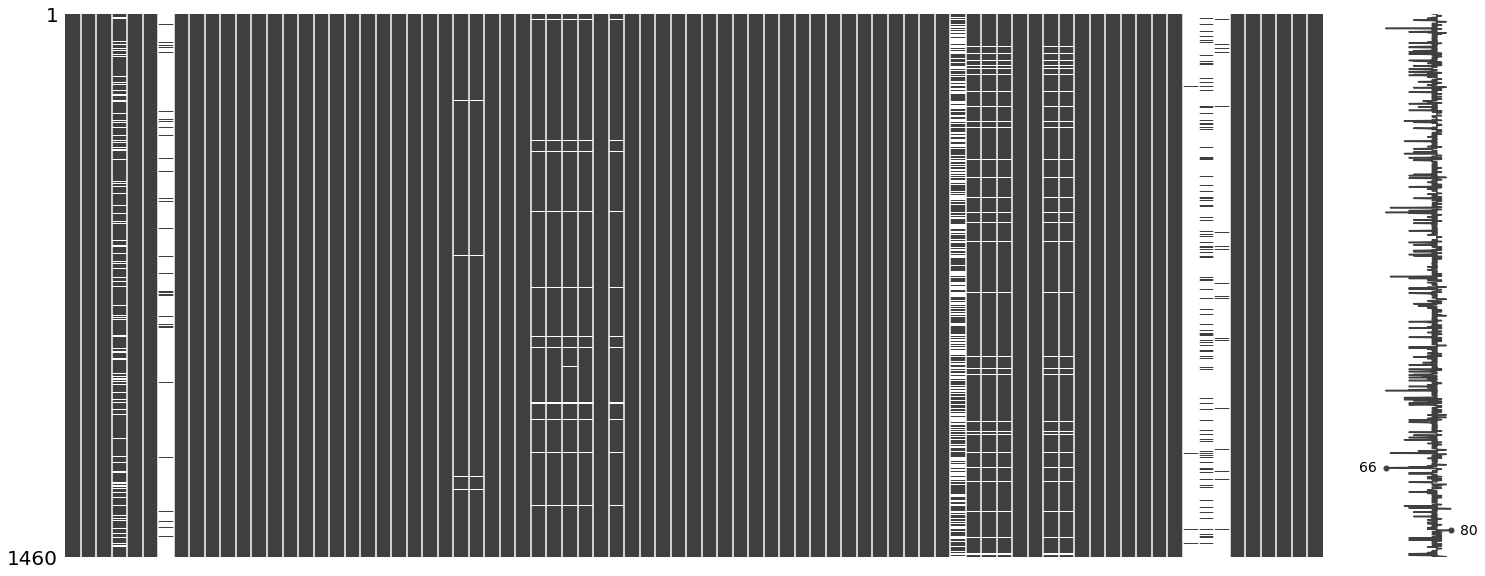

In [8]:
## the white part in the graph are the missing values. 
msno.matrix(train);

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total_missing','Percent_wise'])

missing_percentage(train)

,Total_missing,Percent_wise
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


<h3>Test</h3>

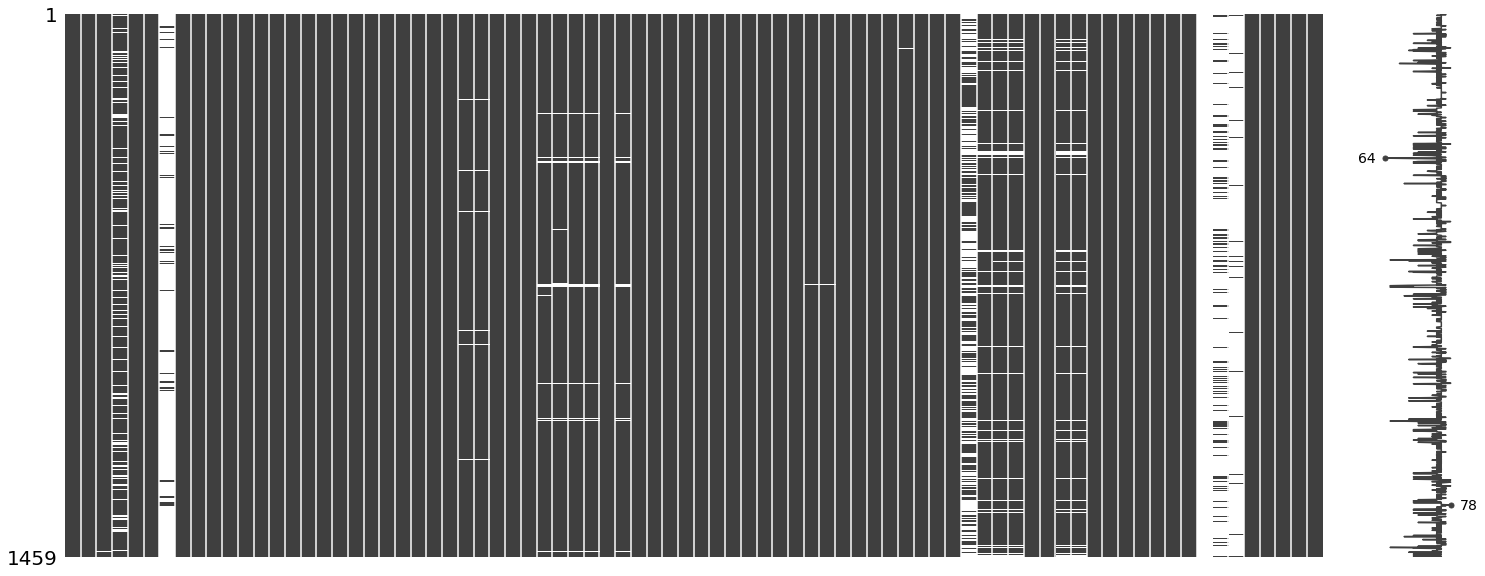

In [10]:
msno.matrix(test);

In [11]:
missing_percentage(test)

,Total_missing,Percent_wise
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


<h4>Relationship between missing values and Sale Price:</h4>

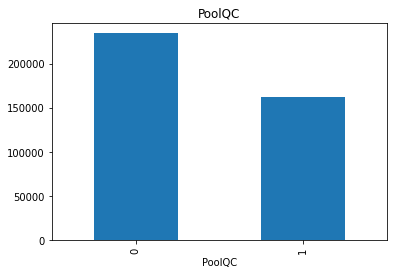

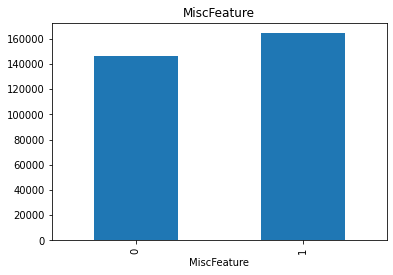

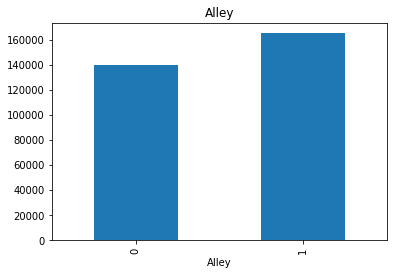

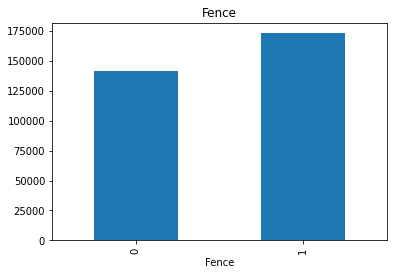

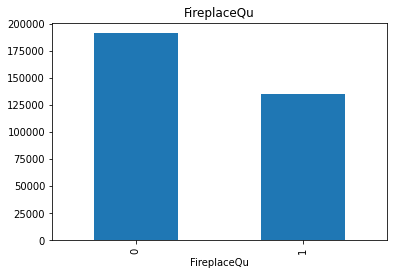

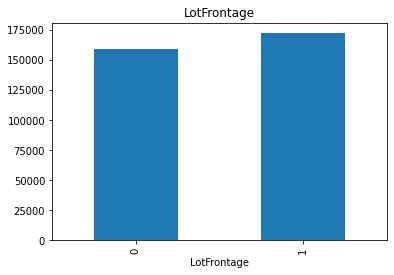

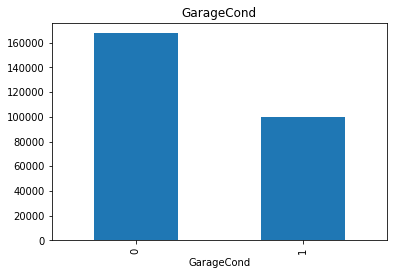

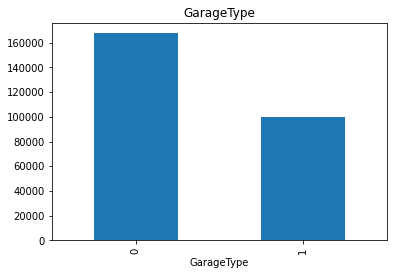

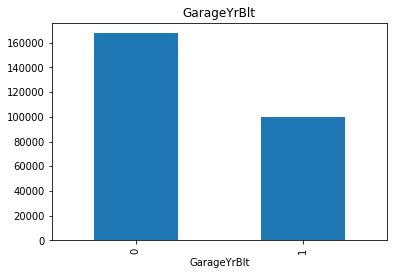

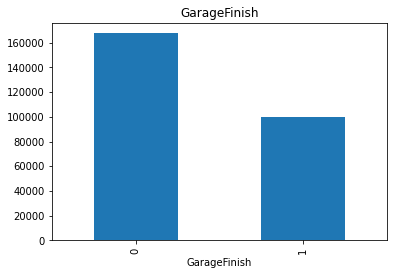

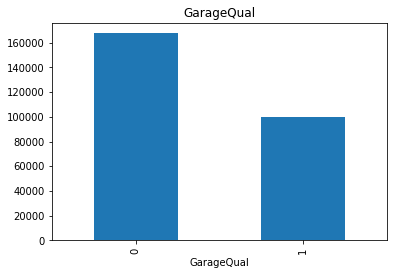

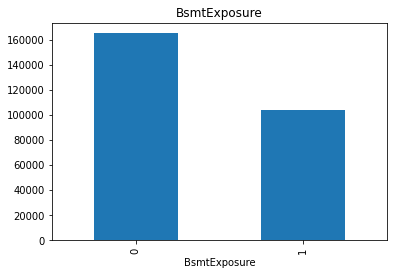

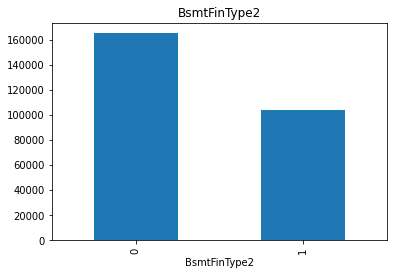

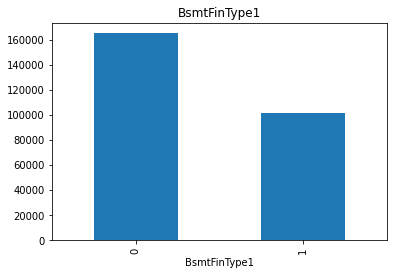

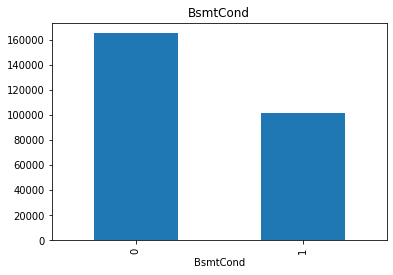

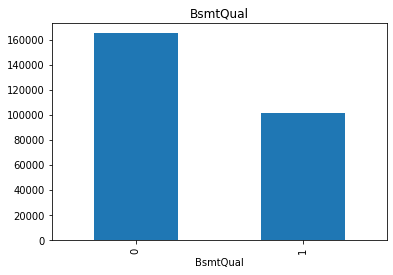

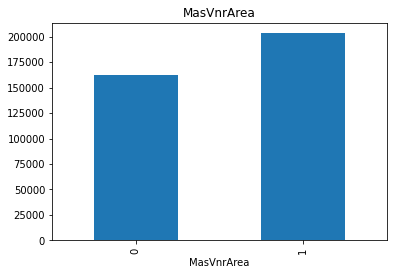

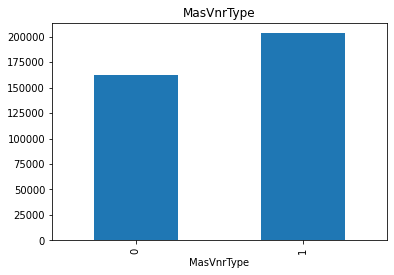

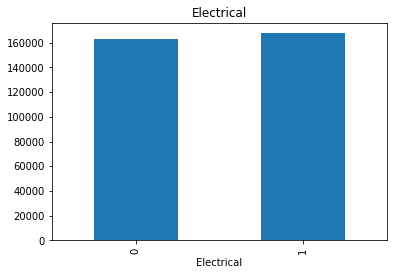

In [12]:
## Making a list of features that contains missing value. 
features_with_na = missing_percentage(train).index

def analyze_na_value(df, var, target):
    """
    This function takes in a dataFrame(df),a variable(var), and a dependent variable(target_feature); 
    assigns 1 if the observaion is missing or 0 otherwise and 
    Returns a bar plot of median values of the target_features.
    e.x.
    features_with_na is a list of values with nan values. 
    "for var in features_with_na:
     analyze_na_value(train, var, 'SalePrice')"
    
    """
    df = df.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where a value is available

    df.groupby(var)[target].median().plot.bar()

    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in features_with_na:
    analyze_na_value(train, var, 'SalePrice')

These plots compare the median SalePrice in the observations where data is missing vs the observations where a value is available. As you can see there is a significant difference in median sale price between where missing value exists and where missing value doesn't exist. <b>We are using median here because mean would not direct us towards a better assumption as there are some outliers present. 

<h2>Numerical variables</h2>

Let's find the numerical variables from the dataset.


In [13]:
# make list of numerical variables
n_vars = [var for var in train.columns if train[var].dtypes != 'O']

print('Number of numerical variables: ', len(n_vars))

# visualise the numerical variables
train[n_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Many of these variables will not be useful for the final model, i.e.,.id column, this column the unique identifier for each house. We will take care of that in the feature engineering selection. 

<h3>Temporal Variable</h3>

There are 4 year variables in the dataset. Let's find them

In [14]:
year_features = [var for var in train.columns if 'Yr' in var or 'Year' in var]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
# let's explore the values of these temporal variables

for feat in year_features:
    print(feat, train[feat].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

You can see these values are represented in years as we hoped. However, we generally don't use data for example year in their raw format, instead we try to get information from them. Let's look at the "YrSold" plot 

Text(0.5, 1.0, 'Change in House price with the years')

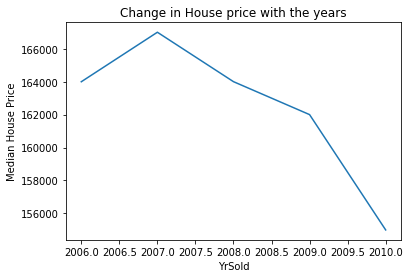

In [16]:
train.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House price with the years')

This plot should raise an eyebrows. As the year increases the price of the houses seems to be decreasing, which in real time is quite unusual. Let's see if there is a relationship between year features and SalePrice

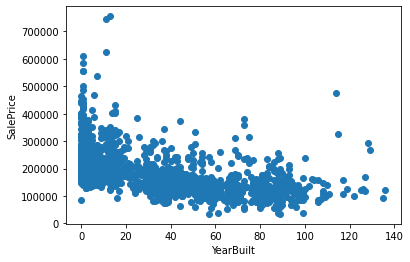

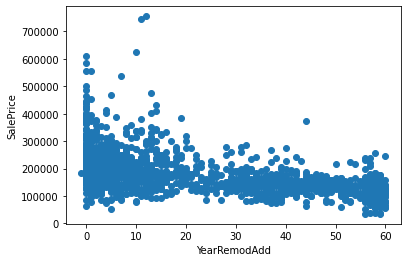

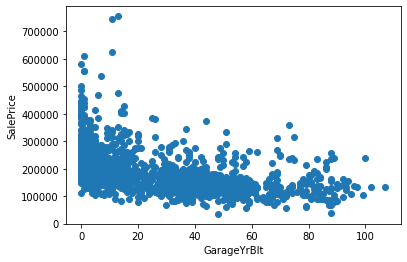

In [17]:
# let's explore the relationship between the year variables
# and the house price in a bit of more detail:

def analyse_year_features(df, feature):
    df = df.copy()
    
    # capture difference between year variable and year
    # in which the house was sold
    df[feature] = df['YrSold'] - df[feature]
    plt.scatter(df[feature], df['SalePrice'], )
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()
    
    
for feature in year_features:
    if feature !='YrSold':
        analyse_year_features(train, feature)
    

These charts seems more like a real life situation case. The longer the time between the house was built/remodeled and sold, the lower the sale price. This is likely, because the houses will have an older look and might need repairing. 

<h3>Discrete Variables</h3>

Let's find the descrete variables, i.e.,show a finite number of values

In [18]:
#  let's make a list of discrete variables
discrete_vars = [var for var in n_vars if len(
    train[var].unique()) < 20 and var not in year_features+['Id']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  14


Let's analyze the discrete variables and see how they are related with the target variable SalePrice. 

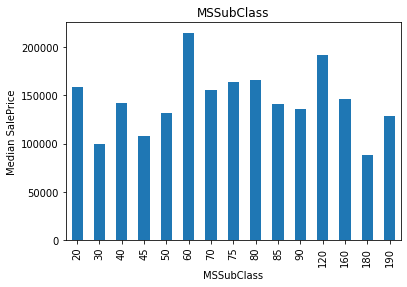

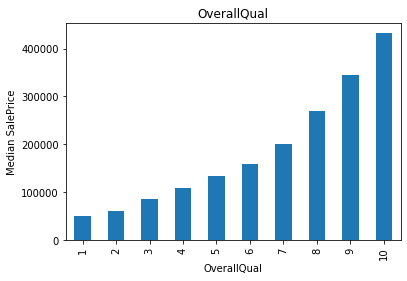

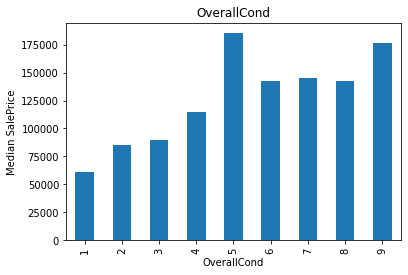

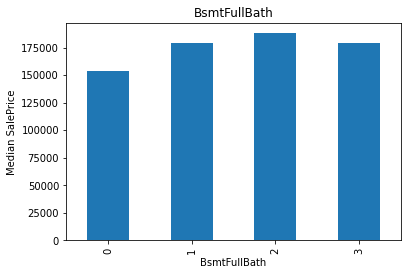

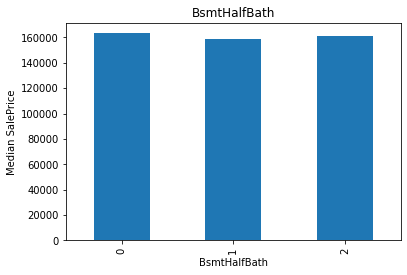

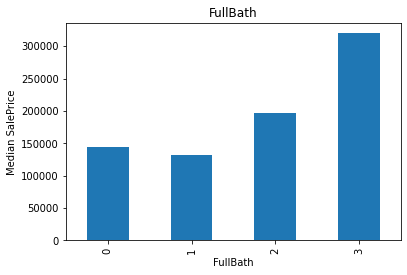

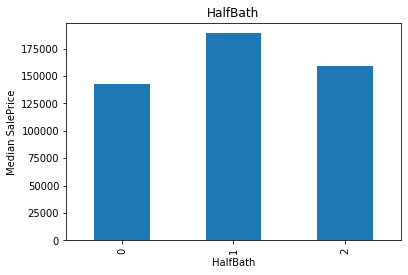

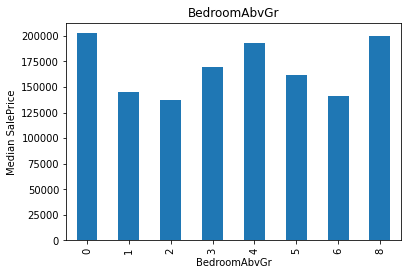

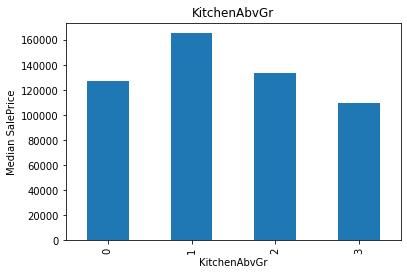

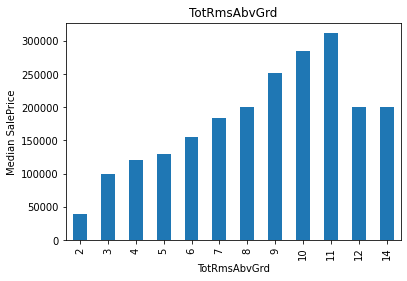

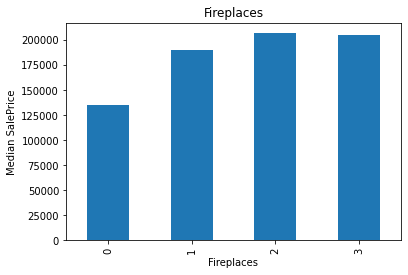

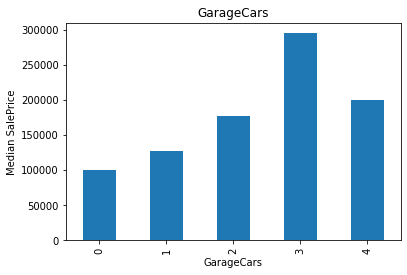

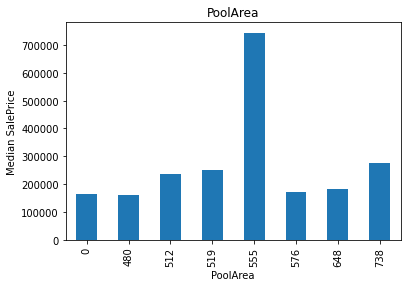

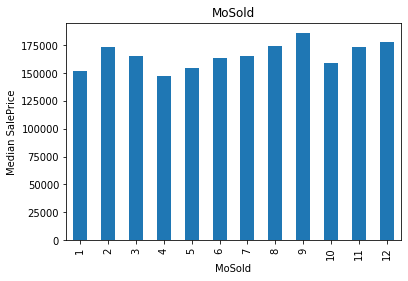

In [19]:
def analyze_discrete(df, var, target):
    """
    This function takes in a dataFrame(df),a variable(var), 
    and a dependent variable(target_feature)
    and returns a plot of median target variable in the y axis and var in the x axis
    """
    df = df.copy()
    df.groupby(var)[target].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median '+ str(target))
    plt.show()
    
for var in discrete_vars:
    analyze_discrete(train, var, 'SalePrice')

There tend to be some relationships between the variables and the SalePrice, for example some are monotonic like OverallQual, some almost monotonic except for a unique values like OverallCond. We need to be particulary careful for these variables to extract maximum values for a linear model. 

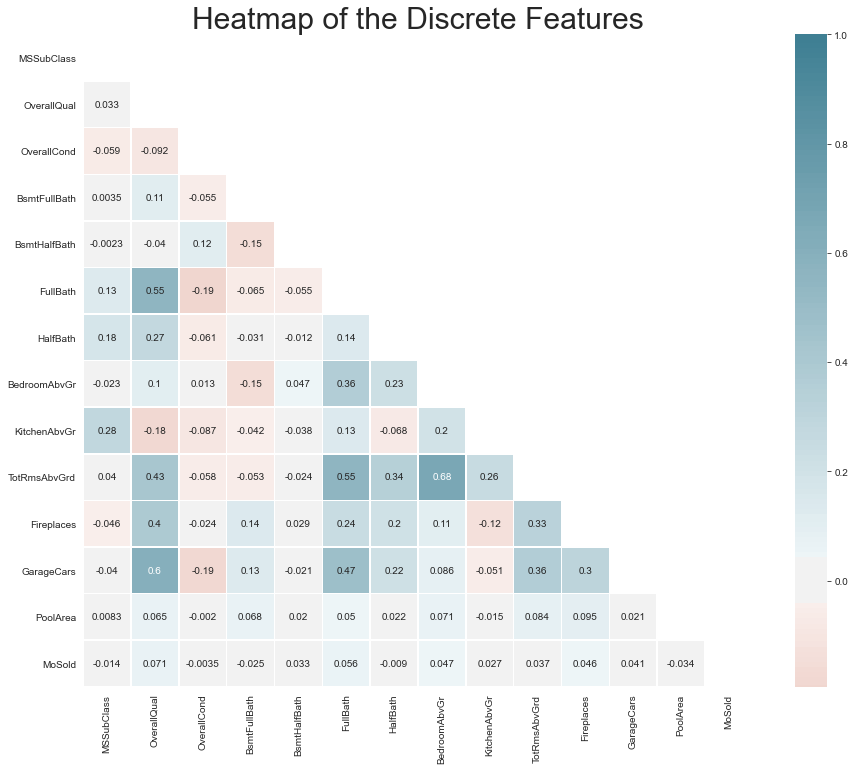

In [20]:
temp = train[discrete_vars].corr()
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(temp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(temp, 
            cmap=sns.diverging_palette(20, 220, n=200), 
#             cbar=False,
            mask = mask, 
            annot=True,
            annot_kws={},
            linecolor='white',
            linewidths=.50,
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of the Discrete Features", fontsize = 30);

<h3>Continous Variables</h3>

Let's find out the continous variables. 

In [21]:
# make list of continuous variables
continous_vars = [var for var in n_vars if var not in discrete_vars+year_features+['Id']]

print('Number of continuous variables: ', len(continous_vars))

Number of continuous variables:  19


In [22]:
train[continous_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


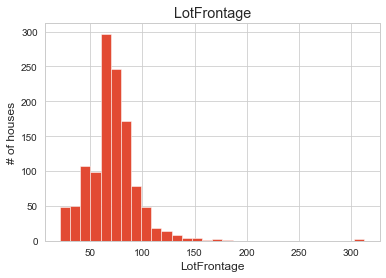

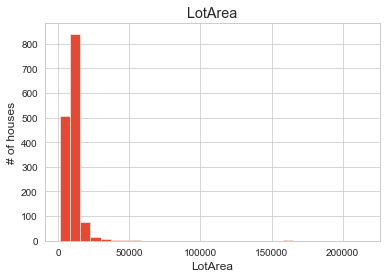

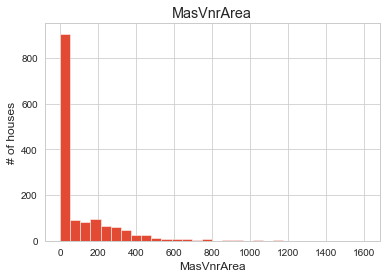

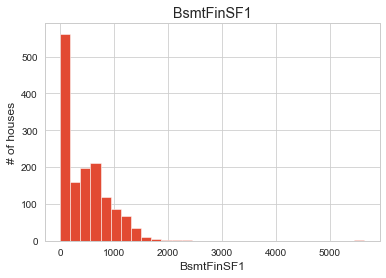

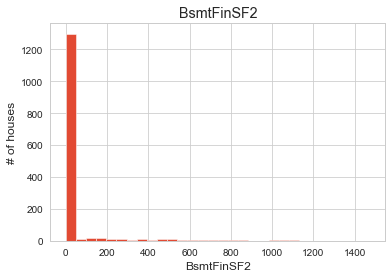

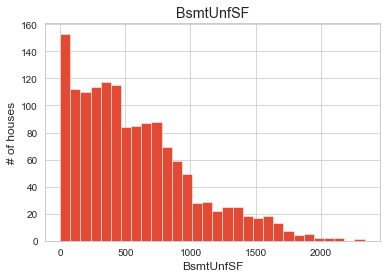

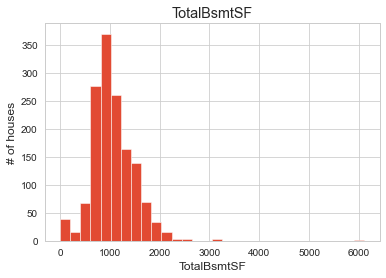

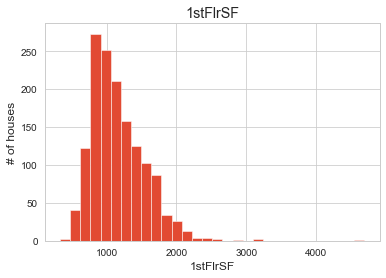

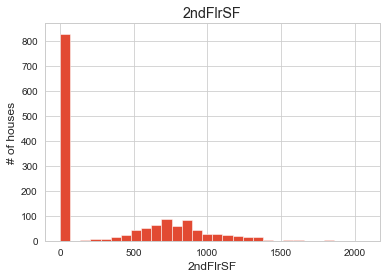

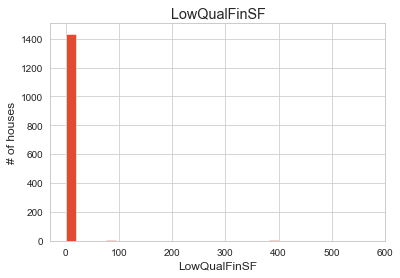

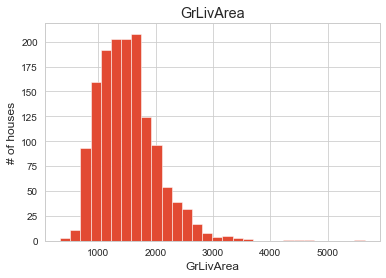

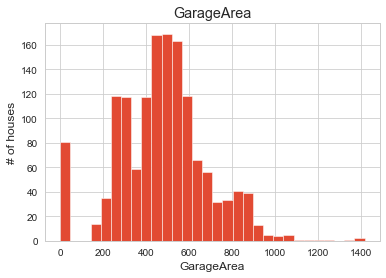

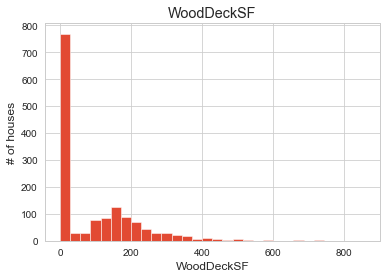

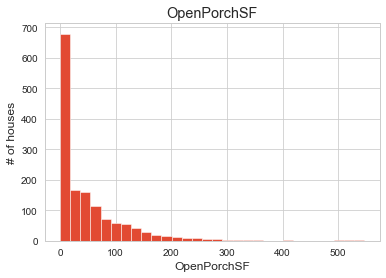

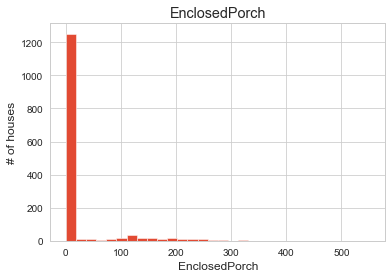

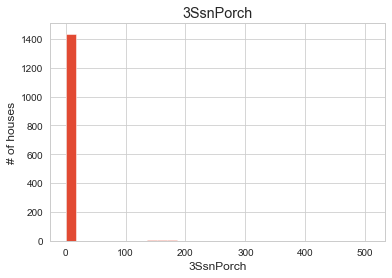

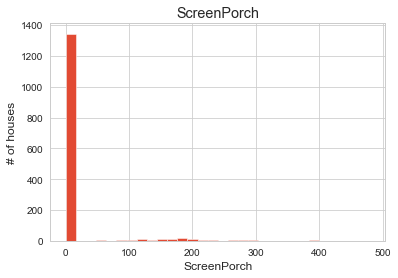

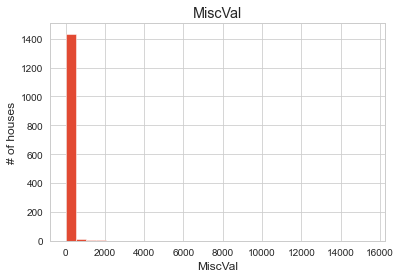

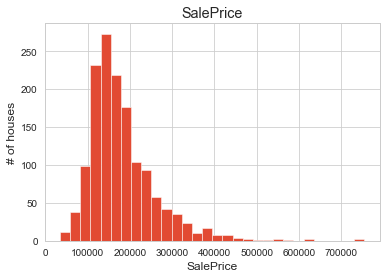

In [23]:
# Let's go ahead and analyse the distributions of these variables


def analyze_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('# of houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in continous_vars:
    analyze_continuous(train, var)

As you can see these variables are not normally distributed including our target variable "SalePrice". In order to maximise performance of linear models, we can use log transformation. We will describe more on this in following parts. We will do the transformation in the feature engineering section. Let's now see how the distribution might look once we do the transformation. 

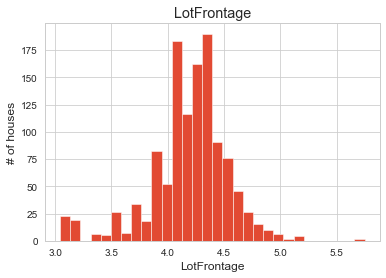

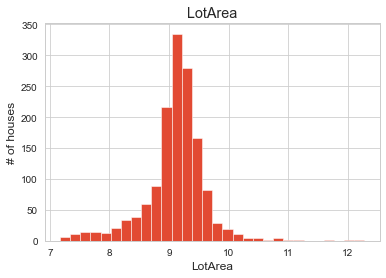

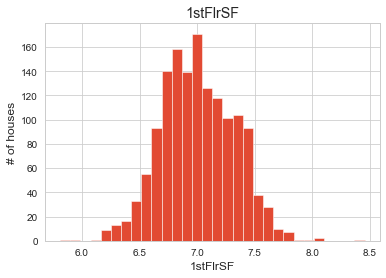

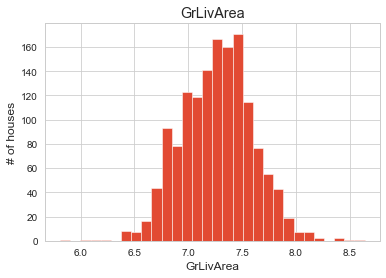

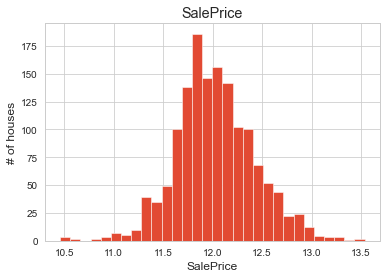

In [24]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation


def analyze_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(df[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('# of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()


for var in continous_vars:
    analyze_transformed_continuous(train, var)

As you can see, we get a better spread of data once we use log transformation.

I want to focus our attention on the target variable which is **SalePrice.** We already know that our target variable is not normally distributed. However, lets go into more details. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression. In previous codes we have seen that log transformation can help us to make features more like normally distribute. I will explain more on this later.

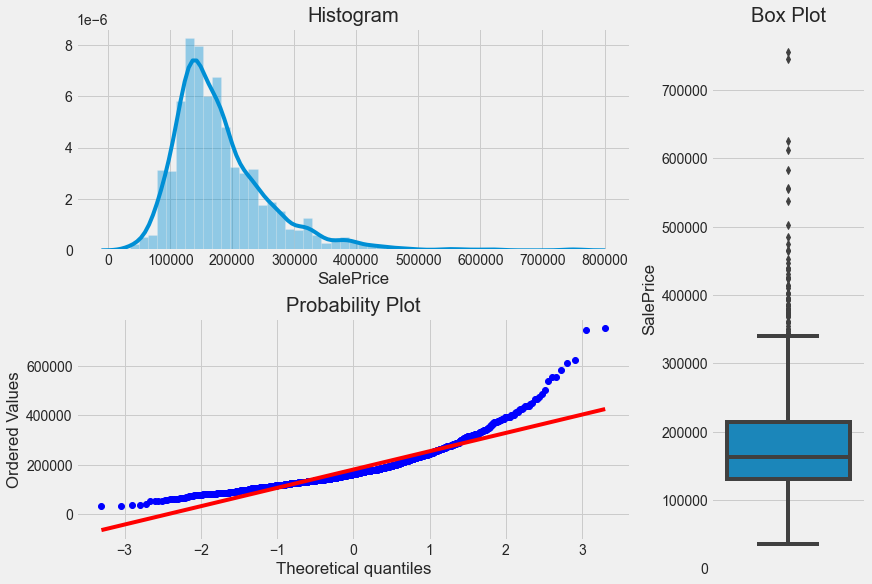

In [25]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

These **three** charts above can tell us a lot about our target variable.
* Our target variable, **SalePrice** is not normally distributed.
* Our target variable is right-skewed. 
* There are multiple outliers in the variable.


**P.S.** 
* If you want to find out more about how to customize charts, try [this](https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) link. 
* If you are learning about Q-Q-plots for the first time. checkout [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. 
* You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time. 

Let's find out how the sales price is distributed.

In [26]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


It looks like there are quite a bit Skewness and Kurtosis in the target variable. Let's talk about those a bit. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates in extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words, **it is the measure of the extreme values(outliers) present in the distribution.** 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic, and Platykurtic</b>. 
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

In [27]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

These are the predictor variables sorted in a descending order starting with the most correlated one **OverallQual**. Let's put this one in a scatter plot and see how it looks.

<h4>SalePrice vs OverallQual</h4>

In [28]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

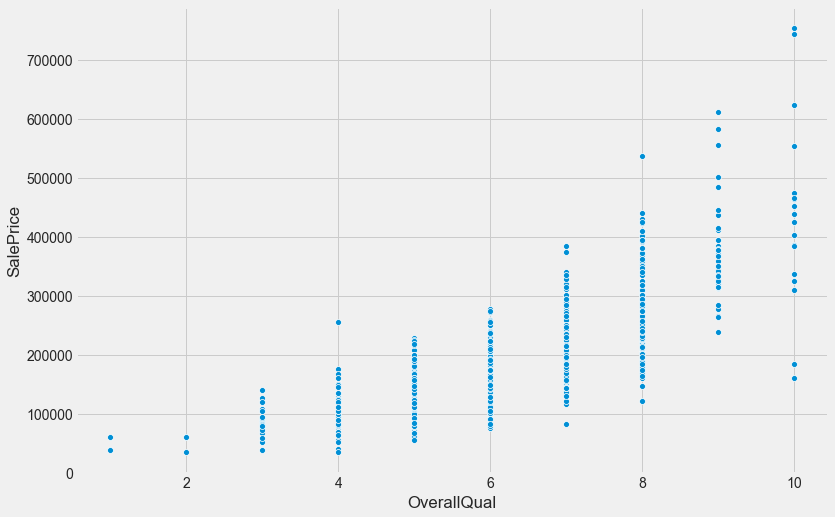

In [29]:
customized_scatterplot(train.SalePrice, train.OverallQual)

**OverallQual** is a categorical variable, and a scatter plot is not the best way to visualize categorical variables. However, there is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's check out some more features to determine the outliers. Let's focus on the numerical variables this time.

<h4>SalePrice vs GrLivArea</h4>

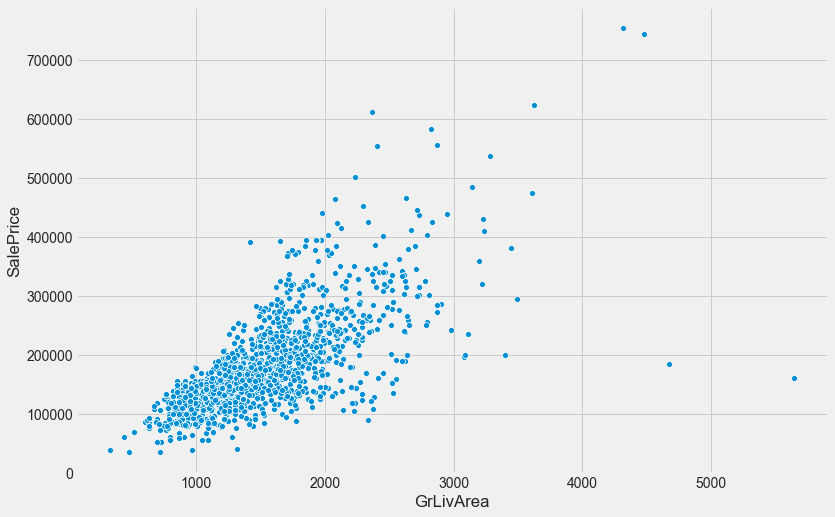

In [30]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

As you can see, there are two outliers in the plot above. We will get rid off them later. Let's look at another scatter plot with a different feature.

<h4>SalePrice vs GarageArea</h4>

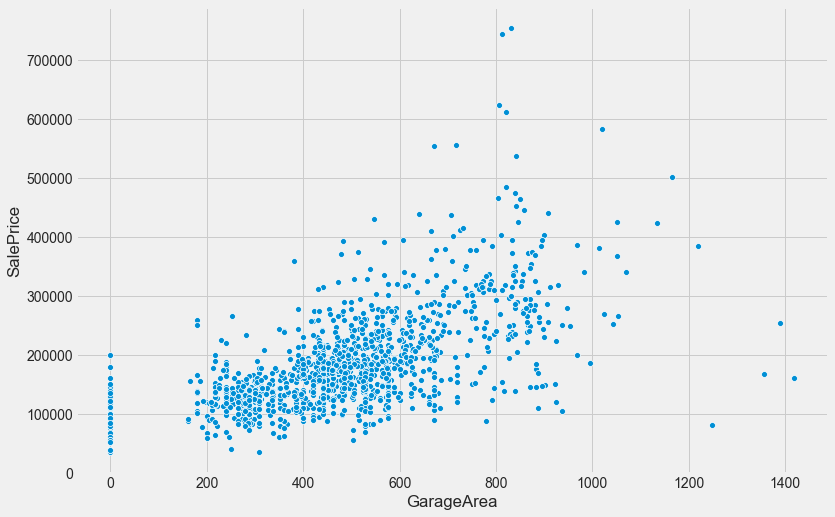

In [31]:
customized_scatterplot(train.SalePrice, train.GarageArea);

And the next one..?
<h4>SalePrice vs TotalBsmtSF</h4>

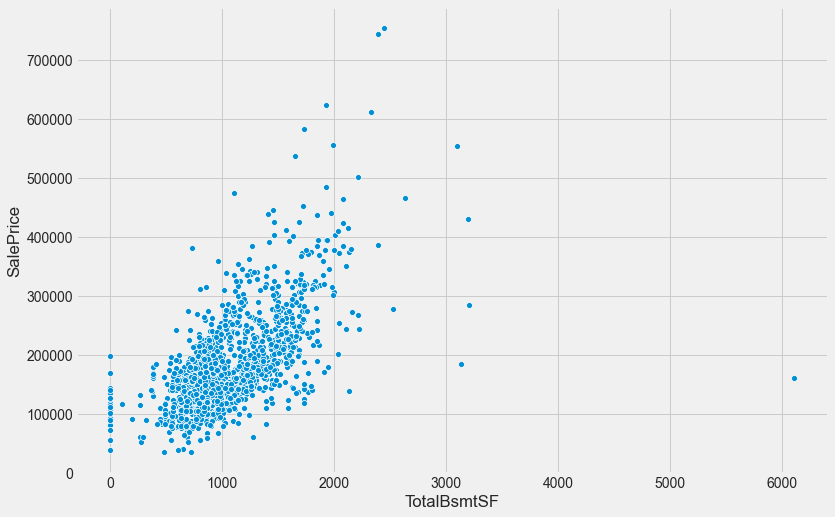

In [32]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

and the next ?
<h4>SalePrice vs 1stFlrSF</h4>

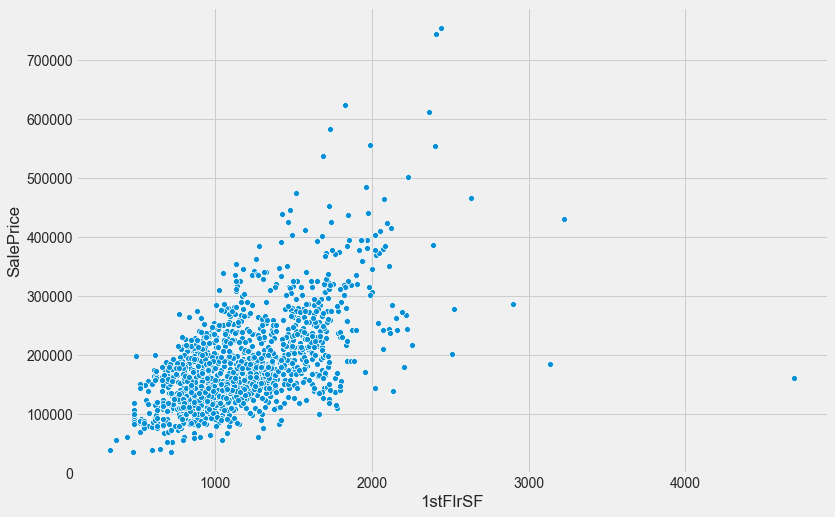

In [33]:
customized_scatterplot(train.SalePrice, train['1stFlrSF']);

How about one more...

<h4>SalePrice vs MasVnrArea</h4>

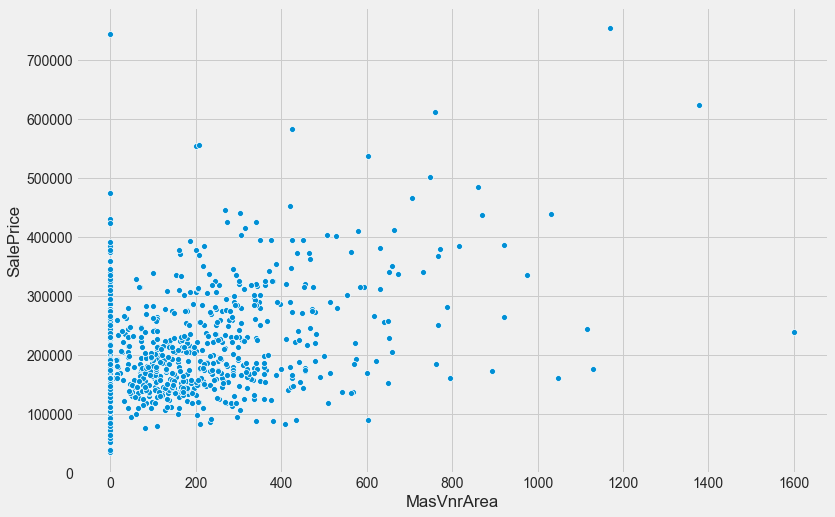

In [34]:
customized_scatterplot(train.SalePrice, train.MasVnrArea);

Okay, I think we have seen enough. Let's discuss what we have found so far. 

<h4>Observations</h4>

* Our target variable shows an unequal level of variance across most predictor(independent) variables. This is called **Heteroscedasticity(more explanation below)** and is a red flag for the multiple linear regression model.
* There are many outliers in the scatter plots above that took my attention. 

* The two on the top-right edge of **SalePrice vs. GrLivArea** seem to follow a trend, which can be explained by saying that "As the prices increased, so did the area. 
* However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two in the feature engineering section.

In [35]:
## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

As we look through these scatter plots, I realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.

<div class="alert alert-info">
    <h4>Assumptions of Regression</h4>
        <ul>
            <li>Linearity ( Correct functional form )</li>
            <li>Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).</li>
            <li>Independence of Errors ( vs Autocorrelation )</li>
            <li>Multivariate Normality ( Normality of Errors )</li>
            <li>No or little Multicollinearity.</li>
        </ul>
</div>
   
Since we fit a linear model, we assume that the relationship is **linear**, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the response(dependent) variable doesn't increase as the value of the predictor(independent) increases, which is the assumptions of equal variance, also known as **Homoscedasticity**. We also assume that the observations are independent of one another(**No Multicollinearity**), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

**Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

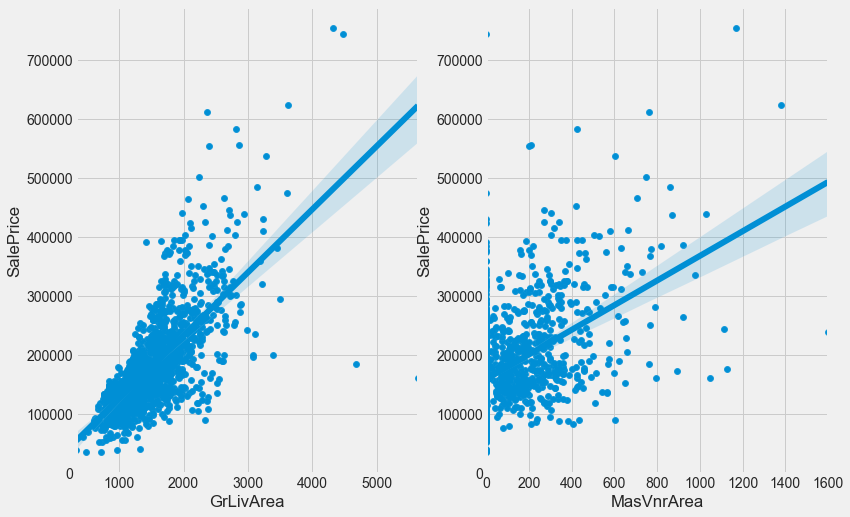

In [36]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

Here we are plotting our target variable with two independent variables **GrLivArea** and **MasVnrArea**. It's pretty apparent from the chart that there is a better linear relationship between **SalePrice** and **GrLivArea** than **SalePrice** and **MasVnrArea**. One thing to take note here, there are some outliers in the dataset. It is imperative to check for outliers since linear regression is sensitive to outlier effects. Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data. In that case, we may need to change our function depending on the data to get the best possible fit. In addition to that, we can also check the residual plot, which tells us how is the error variance across the true line. Let's look at the residual plot for independent variable **GrLivArea** and our target variable **SalePrice **. 

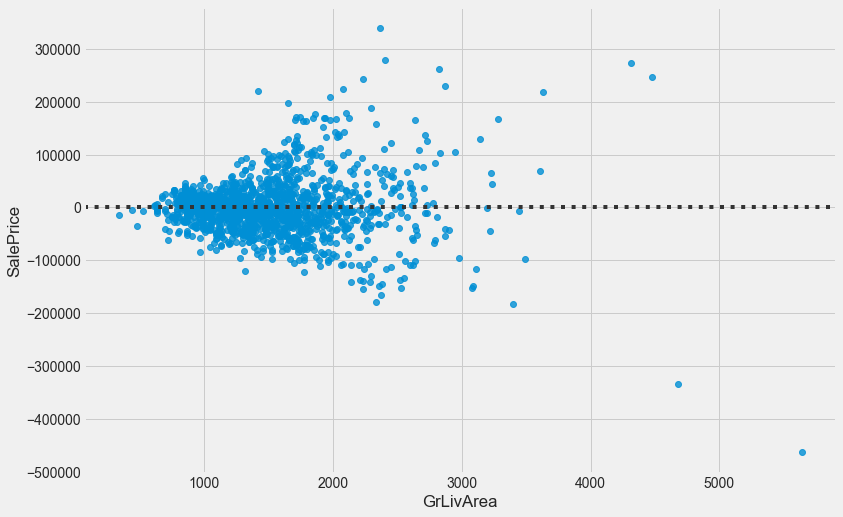

In [37]:
plt.subplots(figsize = (12,8))
sns.residplot(train.GrLivArea, train.SalePrice);

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero. However, our residual plot is anything but an unstructured cloud of points. Even though it seems like there is a linear relationship between the response variable and predictor variable, the residual plot looks more like a funnel. The error plot shows that as **GrLivArea** value increases, the variance also increases, which is the characteristics known as **Heteroscedasticity**. Let's break this down. 

**Homoscedasticity ( Constant Variance ):** 
The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable like the residual plot above, we call that **Heteroscedasticity**. As you can tell, it is the opposite of **Homoscedasticity.**

<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

This plot above is an excellent example of Homoscedasticity. As you can see, the residual variance is the same as the value of the predictor variable increases. One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later.

**Multivariate Normality ( Normality of Errors):**
The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable.

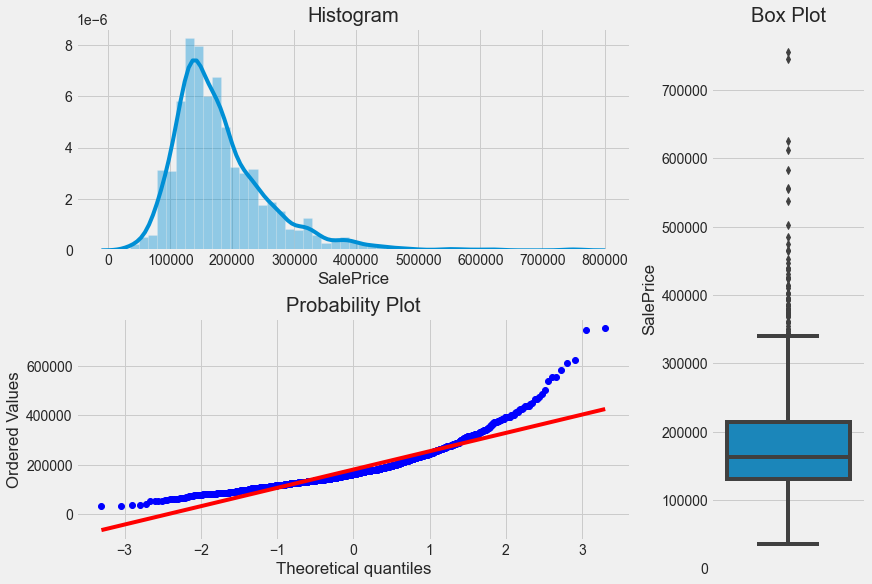

In [38]:
plotting_3_chart(train, 'SalePrice')

Now, let's make sure that the target variable follows a normal distribution. If you want to learn more about the probability plot(Q-Q plot), try [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time.

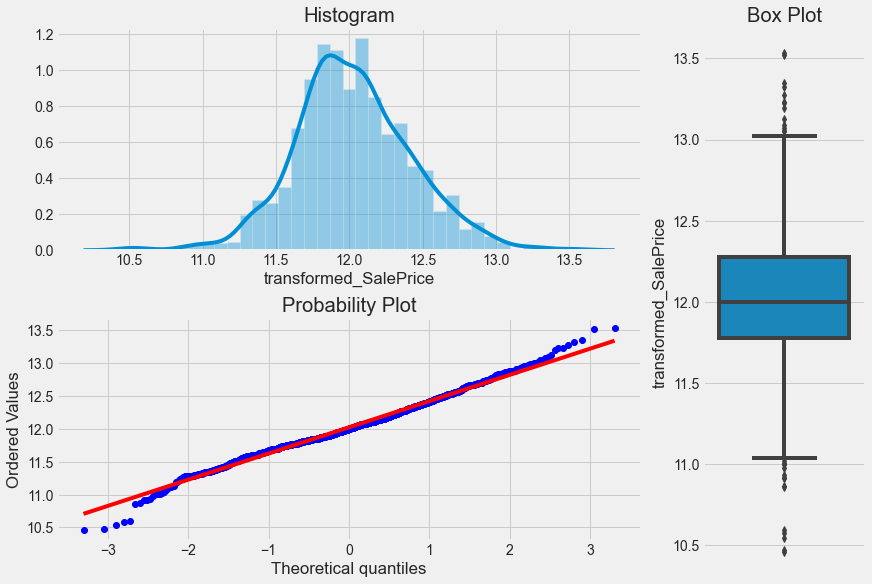

In [39]:
## trainsforming target variable using numpy.log1p
train["transformed_SalePrice"] = np.log1p(train["SalePrice"])

## Plotting the newly transformed response variable
plotting_3_chart(train, 'transformed_SalePrice')

<div class="alert alert-success"><strong>Success!!</strong> As you can see, the log transformation removes the normality of errors, which solves most of the other errors we talked about above. Let's make a comparison of the pre-transformed and post-transformed state of residual plots.</div> 

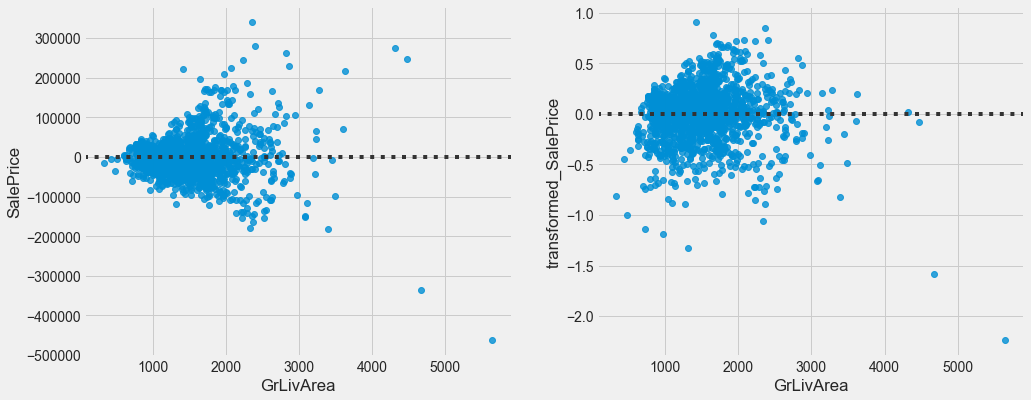

In [40]:
## Customizing grid for two plots. 
fig, (ax1, ax2) = plt.subplots(figsize = (15,6), 
                               ncols=2, 
                               sharey = False, 
                               sharex=False
                              )
## doing the first scatter plot. 
sns.residplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)
## doing the scatter plot for GrLivArea and SalePrice. 
sns.residplot(x = train.GrLivArea, y = train.transformed_SalePrice, ax = ax2);

Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions. 

**No or Little multicollinearity:** 
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

In [41]:
## We will delete the transformed_salePrice for now. 
del train['transformed_SalePrice']

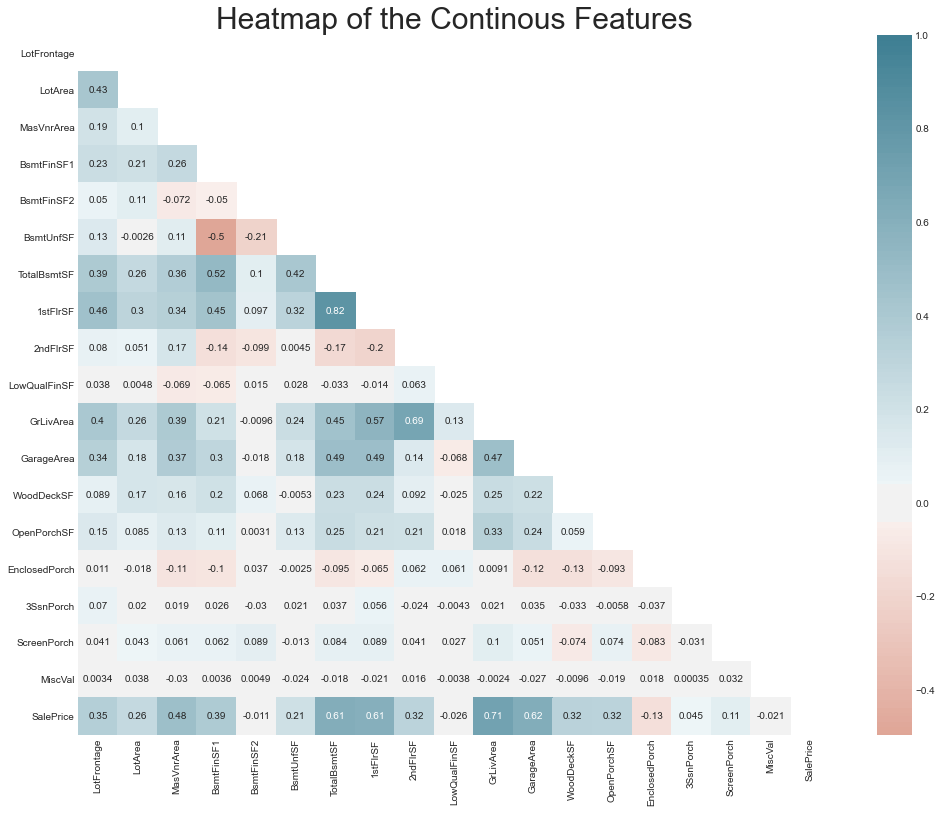

In [42]:
temp = train[continous_vars].corr()
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(temp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(temp, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of the Continous Features", fontsize = 30);

<h4>Observation.</h4>

As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let the models(e.x. Regularization models such as Lasso, Ridge) do the clean up later on. Let's go through some of the correlations that still exists. 

* There is 0.83 or 83% correlation between **GarageYrBlt** and **YearBuilt**. 
* 83% correlation between **TotRmsAbvGrd ** and **GrLivArea**. 
* 89% correlation between **GarageCars** and **GarageArea**. 
* Similarly many other features such as**BsmtUnfSF**, **FullBath** have good correlation with other independent feature.

If I were using only multiple linear regression, I would be deleting these features from the dataset to fit better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible outcome. Therefore, we will keep all the features for now. 

<h4>Resources:</h4>
<ul>
    <li><a href="https://www.statisticssolutions.com/assumptions-of-linear-regression/">Assumptions of Linear Regression</a></li>
    <li><a href="https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/">Assumptions of Multiple Linear Regression</a></li>
    <li><a href="https://www.youtube.com/watch?v=0MFpOQRY0rw/"> Youtube: All regression assumptions explained!<a/></li>
</ul>

<h4>Outliers</h4>

Extreme values affects the performance of a linear model. Let's find out if we have any in our variables. 

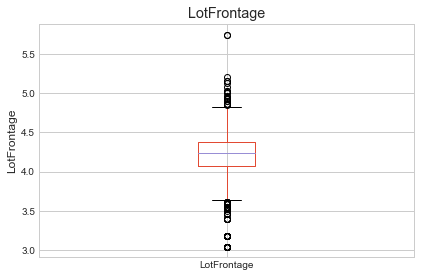

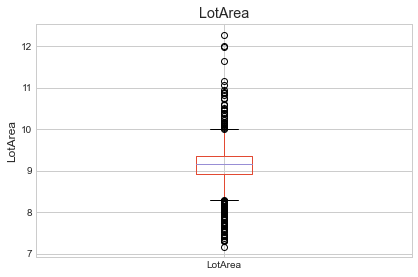

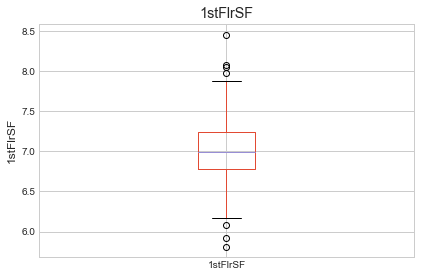

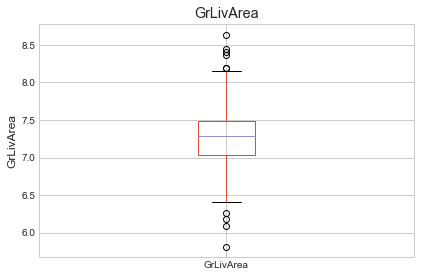

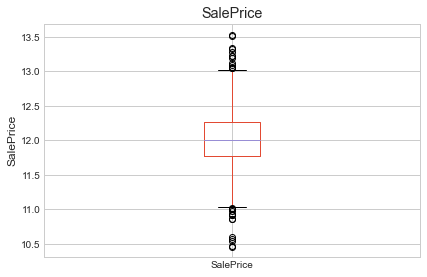

In [43]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if any(df[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in continous_vars:
    find_outliers(train, var)

As you can see most of the continous variables seem to contaion outliers. We will get rid of some of these outliers in the feature engineering section. 

<h3>Categorical Variables</h3>

In [44]:
categorical_vars = [var for var in train.columns if train[var].dtypes == 'O']
train[categorical_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [45]:
print(f"So, There are a total of {len(categorical_vars)} categorical values. Let's see the cardinality of each features.")

So, There are a total of 43 categorical values. Let's see the cardinality of each features.


In [46]:
train[categorical_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

There is less cardinality in these features. In other words the amount of unique value for each feature is not so much that we need to tackle them. 

<h4>Rare Values</h4>
The presence of rare values can skew the model result. The problem with rare values is that, sometimes they are present in the train but not in test, sometimes in test but not in train. In these cases models doesn't know what to do with the values. Let's investigate if there are any labels that are present only in a small number of houses. 

In [47]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in categorical_vars:
    print(analyse_rare_labels(train, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of these categorical variable consists of values that are present in a very small amount. These values can overfit the models significantly. We need to remove them in the Feature engineering section. 

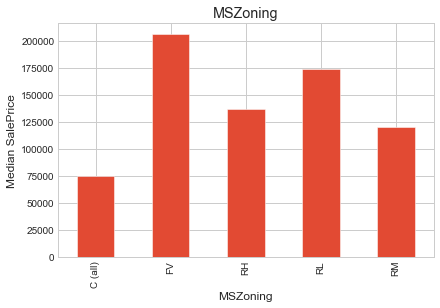

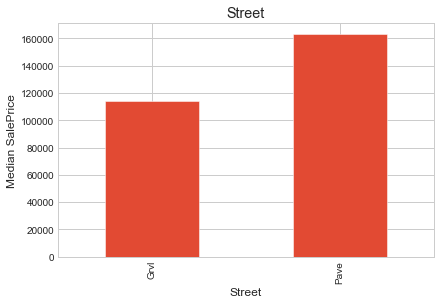

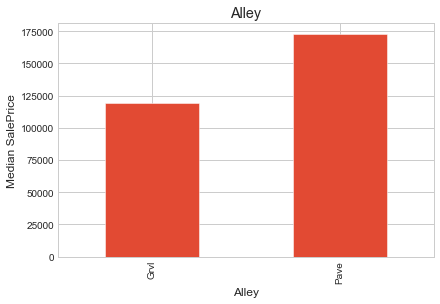

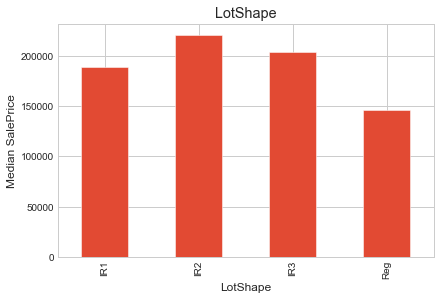

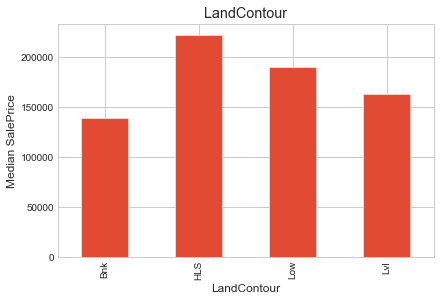

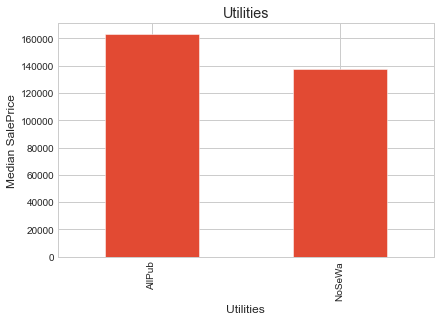

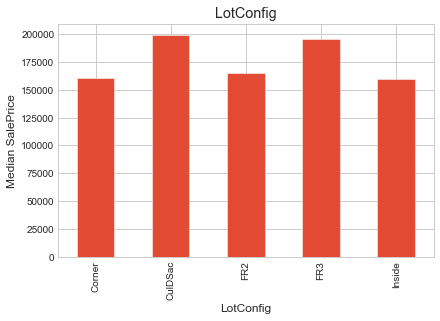

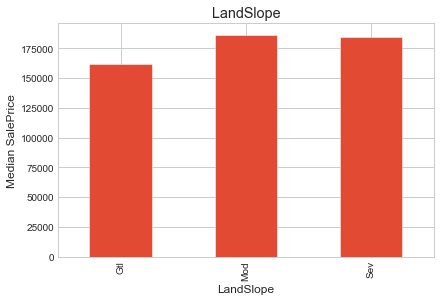

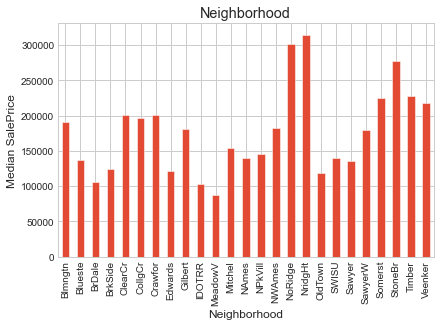

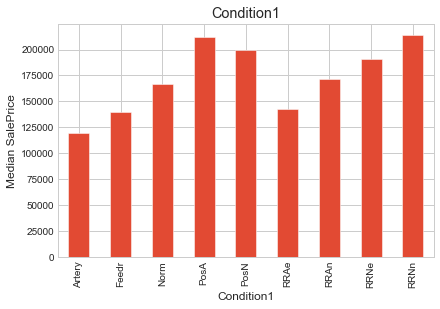

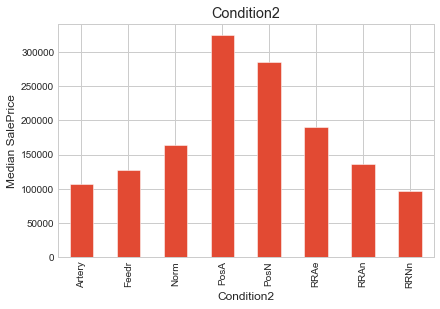

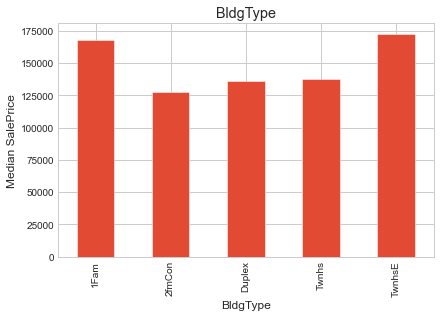

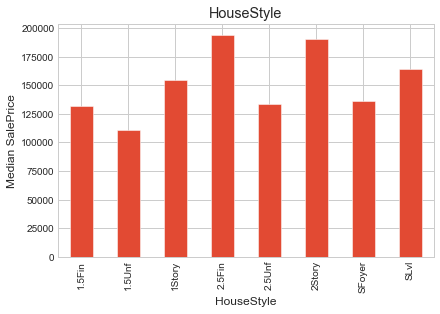

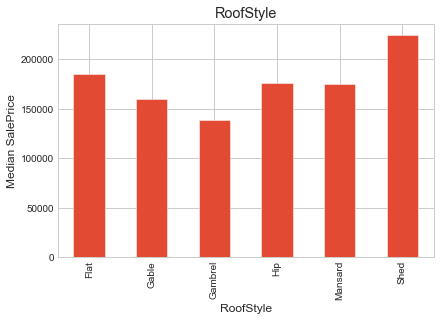

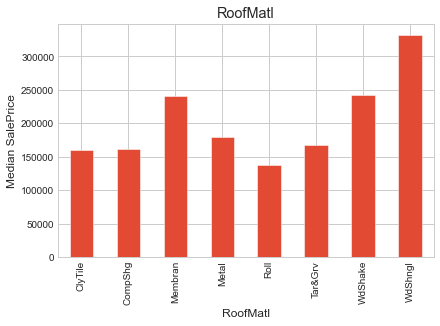

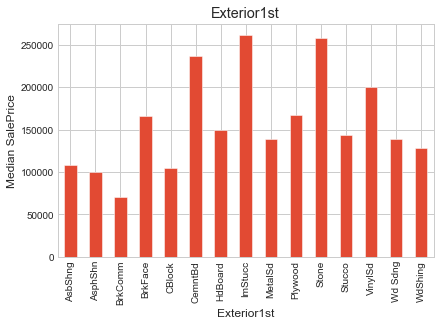

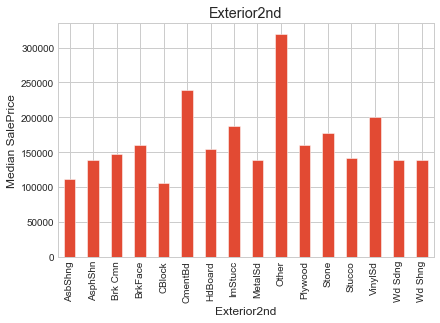

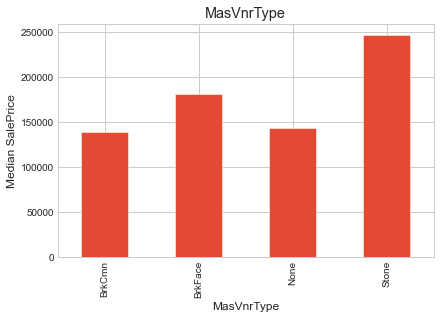

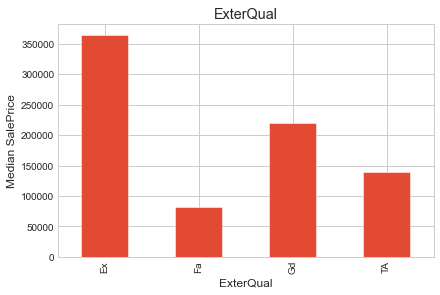

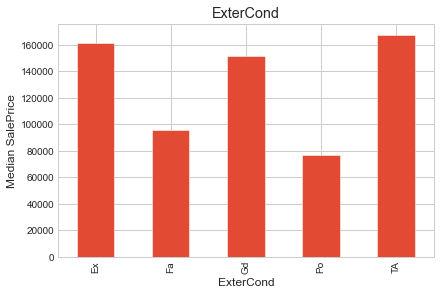

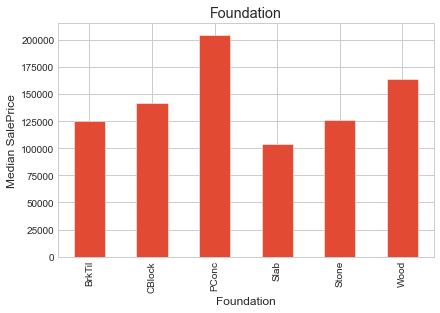

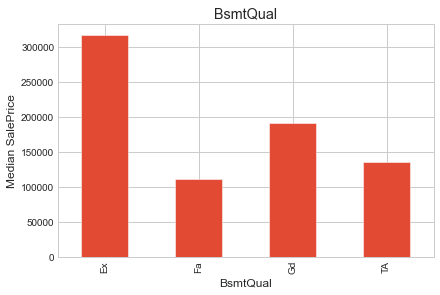

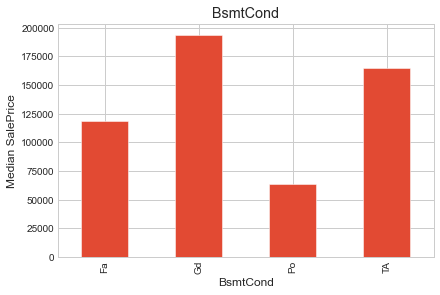

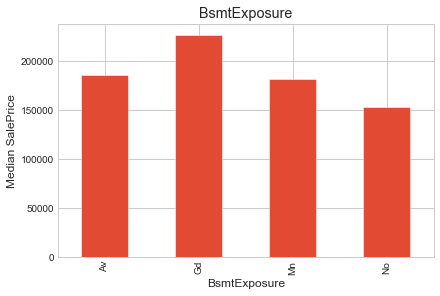

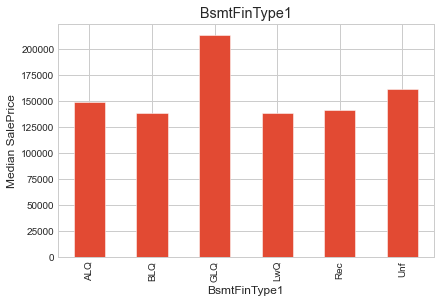

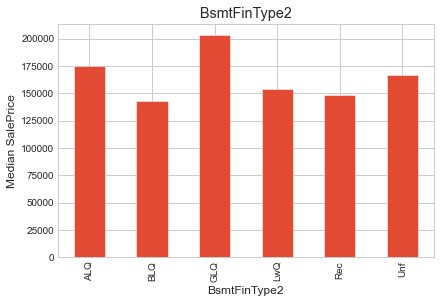

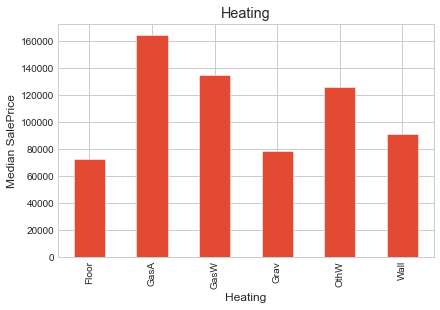

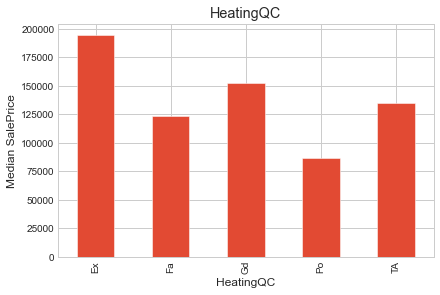

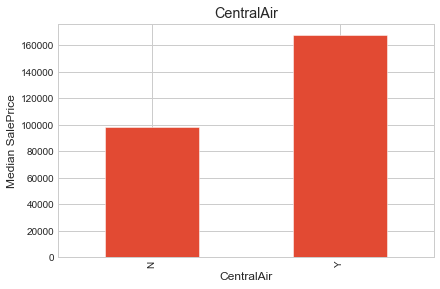

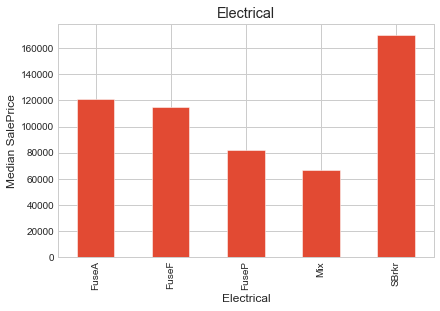

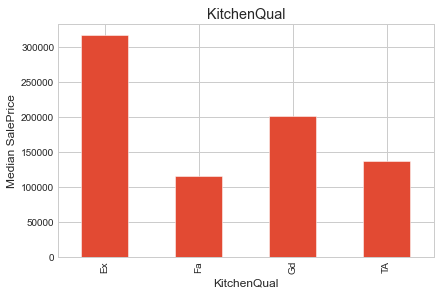

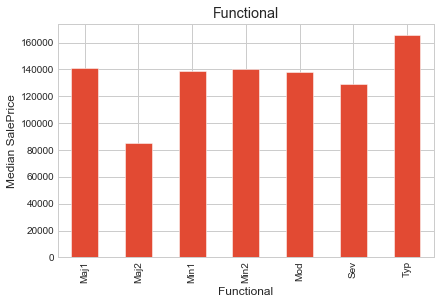

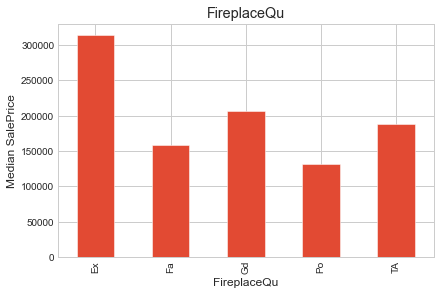

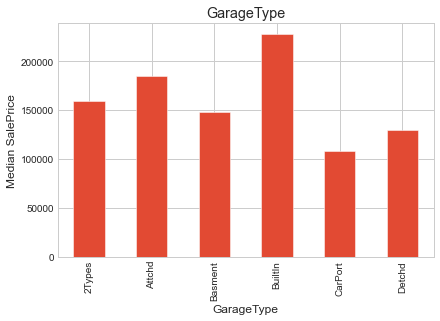

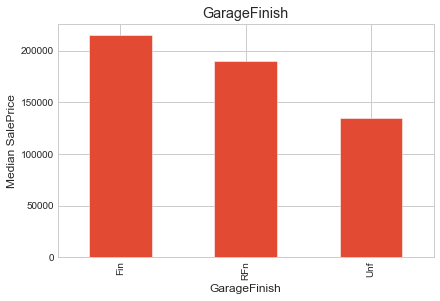

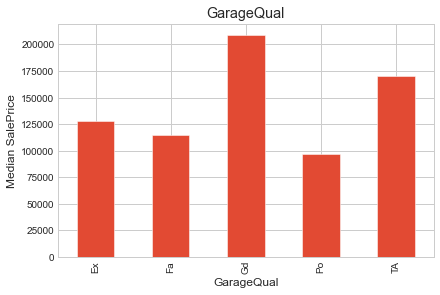

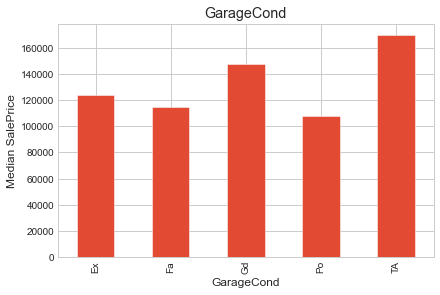

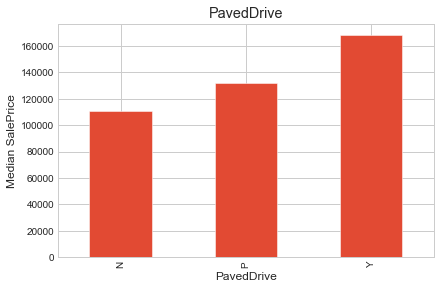

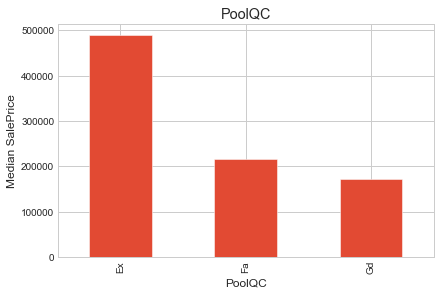

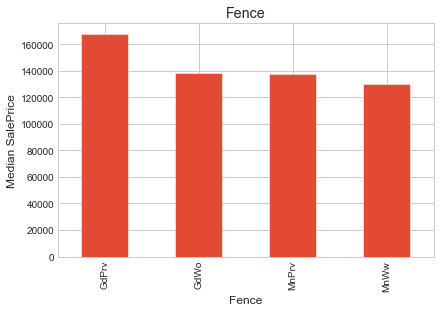

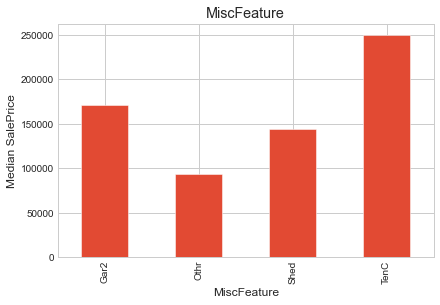

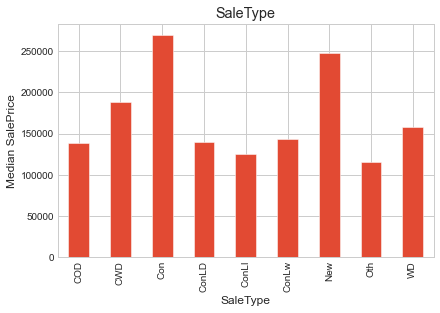

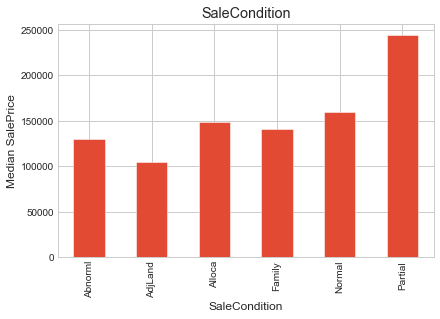

In [48]:
for var in categorical_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyze_discrete(train, var, 'SalePrice')

Clearly these categorical variables shows promising information. We will transform these variable in the feature engineering section to extract necessary information. 

<h1>Feature Engineering</h1>

Here is a list of things we will go over in this section based on this dataset. 
<ul>
    <li>Missing Values</li>
    <li>Temporal variables(year variables)</li>
    <li>Non-Gaussian distributed variables(variables that do not follow a normal distribution.</li>
    <li>Categorical variables: remove rare labels</li>
    <li>Categorical variables: convert strings to numbers</li>
    <li>Standarise the values of the variables to the same range</li>
</ul>

Before we began to engineer the features it is important to separate the data into train and test set. As we engineer existing features or new features, we might use some techniques to learn parameters from the data. In that case we don't want to learn from part of the data that will be used to evaluate the model. This is to avoid over-fitting. 

In [49]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    train['SalePrice'],
                                                    test_size=0.1,
                                                    # we are setting the seed here:
                                                    random_state=0,
#                                                     stratify = train['SalePrice']
                                                   )  

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1314, 81), (146, 81), (1314,), (146,))

<h2>Missing Values</h2>

In [50]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']
for i in missing_val_col:
    X_train[i] = X_train[i].fillna('None')
    X_test[i] = X_test[i].fillna('None')

In [51]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageCars']
for i in missing_val_col2:
    X_train[i] = X_train[i].fillna(0)
    X_test[i] = X_test[i].fillna(0)

In [52]:
# make a list with the numerical variables that contain missing values
num_vars_with_na = [
    var for var in train.columns
    if X_train[var].isnull().sum() > 0 and X_train[var].dtypes != 'O'
]

# print percentage of missing values per variable
X_train[num_vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [53]:
# replace engineer missing values as we described above

for var in num_vars_with_na:

    # calculate the mode using the train set
    mode_val = X_train[var].mode()[0]

    # add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mode
    # (in train and test)
    X_train[var] = X_train[var].fillna(mode_val)
    X_test[var] = X_test[var].fillna(mode_val)

# check that we have no more missing values in the engineered variables
X_train[num_vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [54]:
missing_percentage(X_train)

,Total_missing,Percent_wise
Electrical,1,0.08


In [55]:
missing_percentage(X_test)

,Total_missing,Percent_wise


<div class="alert alert-success"><strong>Success!!</strong> It looks like there is no more missing variables.</div>

<h2>Year Variables</h2>

We learned from the EDA section that getting the elapsed years of yearBuilt, YearRemodAdd and GarageYrBlt actually shows a better relation with median sale prices. So, let's do that. 

In [56]:
def elapsed_years(df, var):
    # capture difference between the year variable
    # and the year in which the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [57]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [58]:
## Checking if the years variable have any missing values in X_test 
[v for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'] if X_test[var].isnull().sum()>0]

[]

<h2>Numeric Variable Transformation</h2>

We are transforming the continous variables. We will use log transformation to do the transformation. One important thing to remember that log doesn't take 0 or negative values, therefore we will have to skip variable including values of 0 or lower. Let's do that. 

In [59]:
log_transformable_vars = [var for var in continous_vars if train[var].dtype != 'O' and all(train[var])>0]


In [60]:
for var in log_transformable_vars:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

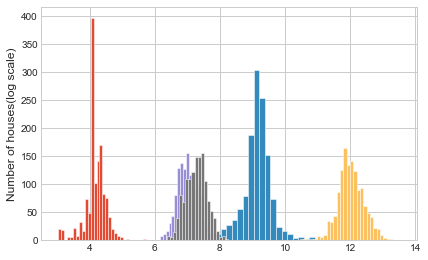

In [61]:
for var in log_transformable_vars:
    X_train[var].hist(bins=30)
plt.ylabel("Number of houses(log scale)");

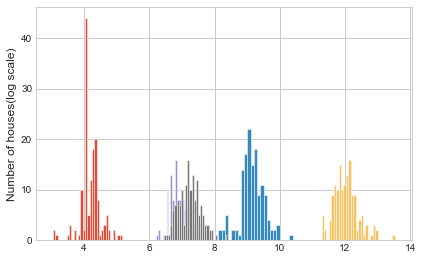

In [62]:
for var in log_transformable_vars:
    X_test[var].hist(bins=30)
plt.ylabel("Number of houses(log scale)");

<div class="alert alert-success"><strong>Success!!</strong> It looks like the transformation was successful. We can see variables are normally distributed(Gaussian distribution).</div>

<h2>Categorical Variables: Dealing with rare Labels/anticipated rare labels</h2>

This is an important step and can save a lot of headache down the road. Here we are not only renaming the rare labels; but also writing codes that deal with labels that may not be in the dataset now but show up in the future. 

In [63]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    return tmp[tmp > rare_perc].index

In [64]:
for var in categorical_vars:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

<h2>Categorical Variables: Converting to String Variables</h2>

In [65]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price


def replace_categories(train, test, var, target):
    """
    This function takes in train, test, a feature, target
    and assign discrete values to the strings of the variables,
    so that the smaller value corresponds to the category that 
    shows the smaller mean of the target variable.
    """

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = train.groupby([var])[target].mean().sort_values(ascending=True).index

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use the dictionary to replace the categorical strings by integers
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [66]:
for var in categorical_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

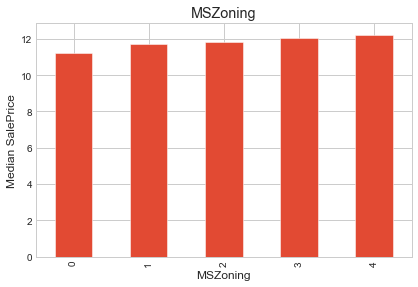

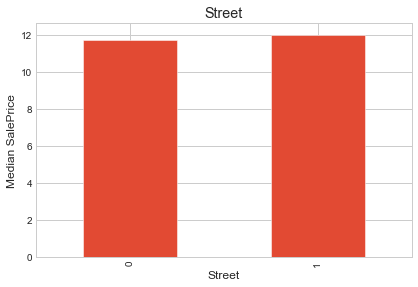

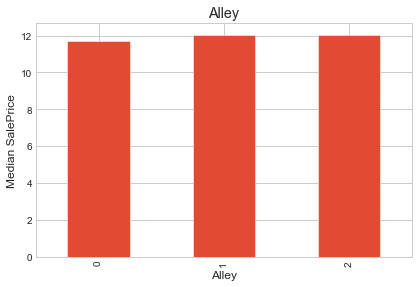

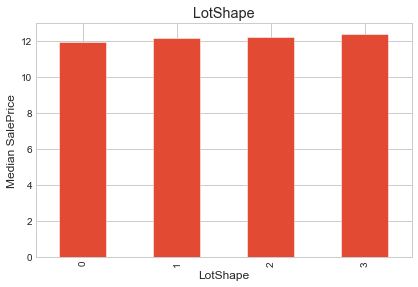

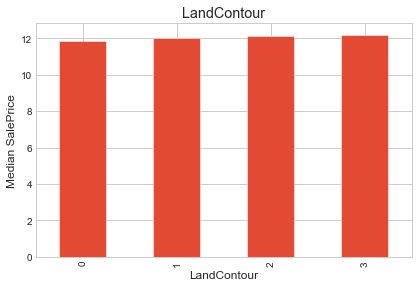

In [67]:
for var in categorical_vars[:5]:
    analyze_discrete(X_train, var, 'SalePrice')

<div class="alert alert-success"><strong>Success!!</strong> It looks like we have successfully converted all the categorical variables and the monotonic relationship is pretty apperant.</div>

<h2>Feature Scaling</h2>

In [68]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,931,20,3,4.290459,9.096612,1,2,1,3,1,...,2,0,7,2009,2,3,12.211060,0,0,0
656,657,20,3,4.276666,9.211040,1,2,1,1,1,...,2,0,8,2008,2,3,11.887931,0,0,0
45,46,120,3,4.110874,8.943506,1,2,0,1,1,...,2,0,2,2010,2,3,12.675764,0,0,0
1348,1349,20,3,4.094345,9.692520,1,2,2,2,1,...,2,0,8,2007,2,3,12.278393,1,0,0
55,56,20,3,4.605170,9.227689,1,2,1,1,1,...,2,0,7,2008,2,3,12.103486,0,0,0


In [69]:
# capture all variables in a list
# except the target and the ID

train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

# count number of variables
len(train_vars)

82

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

<h1>Feature Selection</h1>

In [72]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
## Dropping the "Id" from train and test set. 
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y = train['SalePrice'].reset_index(drop=True)

# getting a copy of train
previous_train = train.copy()

In [74]:
## Combining train and test datasets together so that we can do all the work at once. 
all_data = pd.concat((train, test)).reset_index(drop = True)
## Dropping the target variable. 
all_data.drop(['SalePrice'], axis = 1, inplace = True)

<h2>Dealing with Missing Values</h2>

* Missing data in train and test data(all_data)

In [75]:
del all_data['transformed_SalePrice']

KeyError: 'transformed_SalePrice'

In [ ]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [ ]:
## In the following features the null values are there for a purpose, so we replace them with "0"
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [ ]:
all_data.groupby('MSSubClass')['MSZoning']

In [ ]:
all_data['MSZoning'].value_counts(dropna = False)

In [ ]:
## the "OverallCond" and "OverallQual" of the house. 
# all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Zoning class are given in numerical; therefore converted to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

## Important years and months that should be categorical variables not numerical. 
# all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
# all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 

In [ ]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 


In [ ]:
missing_percentage(all_data)

So, there are no missing value left. 

## Fixing Skewness

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

In [ ]:
## Fixing Skewed features using boxcox transformation. 


def fixing_skewness(df):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    ## Getting all the numerical features. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(all_data)

In [ ]:
sns.distplot(all_data['1stFlrSF']);

## Creating New Features

In [ ]:
# feture engineering a new feature "TotalFS"
all_data['TotalSF'] = (all_data['TotalBsmtSF'] 
                       + all_data['1stFlrSF'] 
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] 
                                 + all_data['BsmtFinSF2'] 
                                 + all_data['1stFlrSF'] 
                                 + all_data['2ndFlrSF']
                                )
                                 

all_data['Total_Bathrooms'] = (all_data['FullBath'] 
                               + (0.5 * all_data['HalfBath']) 
                               + all_data['BsmtFullBath'] 
                               + (0.5 * all_data['BsmtHalfBath'])
                              )
                               

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] 
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch'] 
                              + all_data['ScreenPorch'] 
                              + all_data['WoodDeckSF']
                             )
                              
                              


In [ ]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
all_data.shape

## Deleting features

In [ ]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

## Creating Dummy Variables. 


In [ ]:
## Creating dummy variable 
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

In [ ]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [ ]:
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

In [ ]:
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [ ]:
X.shape,y.shape, X_sub.shape

# Fitting model(simple approach)

## Train_test split
 
We have separated dependent and independent features; We have separated train and test data. So, why do we still have to split our training data? If you are curious about that, I have the answer. For this competition, when we train the machine learning algorithms, we use part of the training set, usually two-thirds of the train data. Once we train our algorithm using 2/3 of the train data, we start to test our algorithms using the remaining data. If the model performs well, we dump our test data in the algorithms to predict and submit the competition. The code below, basically splits the train data into 4 parts, <b>X_train, X_test, y_train, y_test.</b>
* <b>X_train, y_train</b> first used to train the algorithm. 
* then, **X_test** is used in that trained algorithms to predict **outcomes. **
* Once we get the **outcomes**, we compare it with **y_test**

By comparing the **outcome** of the model with **test_y**, we can determine whether our algorithms are performing well or not. Once we are confident about the result of our algorithm, we may use the model to on the original test data and submit in the challenge. I have tried to show this whole process in the visualization chart below.

In [ ]:
## Train test s
from sklearn.model_selection import train_test_split
## Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Modeling the Data
 
Before modeling each algorithm, I would like to discuss them for a better understanding. This way I would review what I know and at the same time help out the community. If you already know enough about Linear Regression, you may skip this part and go straight to the part where I fit the model. However, if you take your time to read this and other model description sections and let me know how I am doing, I would genuinely appreciate it. Let's get started. 

**Linear Regression**
<div>
    We will start with one of the most basic but useful machine learning model, **Linear Regression**. However, do not let the simplicity of this model fool you, as Linear Regression is the base some of the most complex models out there. For the sake of understanding this model, we will use only two features, **SalePrice** and **GrLivArea**. Let's take a sample of the data and graph it.

In [ ]:
sample_train = previous_train.sample(300)
import seaborn as sns
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
plt.title("Chart with Data Points");
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
#ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');

As we discussed before, there is a linear relationship between SalePrice and GrLivArea. We want to know/estimate/predict the sale price of a house based on the given area, How do we do that? One naive way is to find the average of all the house prices. Let's find a line with the average of all houses and place it in the scatter plot. Simple enough.

In [ ]:
plt.subplots(figsize = (15,8))
ax = plt.gca()
ax.scatter(sample_train.GrLivArea.values, sample_train.SalePrice.values, color ='b');
#ax = sns.regplot(sample_train.GrLivArea.values, sample_train.SalePrice.values)
ax.plot((sample_train.GrLivArea.values.min(),sample_train.GrLivArea.values.max()), (sample_train.SalePrice.values.mean(),sample_train.SalePrice.values.mean()), color = 'r');
plt.title("Chart with Average Line");

You can tell this is not the most efficient way to estimate the price of houses. The average line clearly does not represent all the datapoint and fails to grasp the linear relationship between <b>GrLivArea & SalePrice. </b> Let use one of the evaluation regression metrics and find out the Mean Squared Error(more on this later) of this line.

In [ ]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_sale_price'] = sample_train.SalePrice.mean()
sample_train['mse'] = np.square(sample_train.mean_sale_price - sample_train.SalePrice)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

> If you are reading this in my github page, you may find it difficult to follow through as the following section includes mathematical equation. Please checkout [this](https://www.kaggle.com/masumrumi/a-stats-analysis-and-ml-workflow-of-house-pricing) kernel at Kaggle. 

We will explain more on MSE later. For now, let's just say, the closer the value of MSE is to "0", the better. Of course, it makes sense since we are talking about an error(mean squared error). We want to minimize this error. How can we do that? 

Introducing **Linear Regression**, one of the most basic and straightforward models. Many of us may have learned to show the relationship between two variable using something called "y equals mX plus b." Let's refresh our memory and call upon on that equation.



# $$ {y} = mX + b $$



Here, 
* **m** = slope of the regression line. It represents the relationship between X and y. In another word, it gives weight as to for each x(horizontal space) how much y(vertical space) we have to cover. In machine learning, we call it **coefficient**. 
* **b** = y-intercept. 
* **x** and **y** are the data points located in x_axis and y_axis respectively. 


<br/>

If you would like to know more about this equation, Please check out this [video](https://www.khanacademy.org/math/algebra/two-var-linear-equations/writing-slope-intercept-equations/v/graphs-using-slope-intercept-form). 

This slope equation gives us an exact linear relationship between X and y. This relationship is "exact" because we are given X and y beforehand and based on the value of X and y, we come up with the slope and y-intercept, which in turns determine the relationship between X and y. However, in real life, data is not that simple. Often the relationship is unknown to us, and even if we know the relationship, it may not always be exact. To fit an exact slope equation in an inexact relationship of data we introduce the term error. Let's see how mathematicians express this error with the slope equation. 

## $$ y = \beta_0 + \beta_1 x_1 + \epsilon \\ $$

And, this is the equation for a simple linear regression.
Here,
* y = Dependent variable. This is what we are trying to estimate/solve/understand. 
* $\beta_0$ = the y-intercept, it is a constant and it represents the value of y when x is 0. 
* $\beta_1$ = Slope, Weight, Coefficient of x. This metrics is the relationship between y and x. In simple terms, it shows 1 unit of increase in y changes when 1 unit increases in x. 
* $x_1$ = Independent variable ( simple linear regression ) /variables.
* $ \epsilon$ = error or residual. 

### $$ \text{residual}_i = y_i - \hat{y}_i$$
This error is the only part that's different/addition from the slope equation. This error exists because in real life we will never have a dataset where the regression line crosses exactly every single data point. There will be at least a good amount of points where the regression line will not be able to go through for the sake of model specifications(linear/non-linear) and <b>bias-variance tradeoff</b>(more on this later). This error term accounts for the difference of those points. So, simply speaking, an error is the difference between an original value( $y_i$ ) and a predicted value( $\hat{y}_i$ ). 

We use this function to predict the values of one dependent(target) variable based on one independent(predictor) variable. Therefore this regression is called **Simple linear regression(SLR).** If we were to write the equation regarding the sample example above it would simply look like the following equation, 
## $$ Sale Price= \beta_0 + \beta_1 (Area) + \epsilon \\ $$

This equation gives us a line that fits the data and often performs better than the average line above. But,
* How do we know that Linear regression line is actually performing better than the average line? 
* What metrics can we use to answer that? 
* How do we know if this line is even the best line(best-fit line) for the dataset? 
* If we want to get even more clear on this we may start with answering, How do we find the $\beta_0$(intercept) and  $\beta_1$(coefficient) of the equation?

<b>Finding $\beta_0$(intercept) and  $\beta_1$(coefficient):</b>

We can use the following equation to find the $\beta_0$(intercept) and  $\beta_1$(coefficient)


### $$ \hat{\beta}_1 = r_{xy} \frac{s_y}{s_x}$$
### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

Here...
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_y$ : the sample standard deviation of observed values $Y$
- $s_x$ : the sample standard deviation of observed values $X$

    > There are two types of STD's. one is for sample population and one is for Total population.
    > Check out [this](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) article for more. 

- $r_{xy}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$


I hope most of us know how to calculate all these components from the two equations above by hand. I am going to only mention the equation of the pearson correlation(r_xy) here as it may be unknown to some of the readers. 

### $$ r_{xy}= \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum(x_i - \bar{x})^2{\sum(y_i - \bar{y})^2}}}$$

Let's get on with calculating the rest by coding.

In [ ]:
## Calculating the beta coefficients by hand. 
## mean of y. 
y_bar = sample_train.SalePrice.mean()
## mean of x. 
x_bar = sample_train.GrLivArea.mean()
## Std of y
std_y = sample_train.SalePrice.std()
## std of x
std_x = sample_train.GrLivArea.std()
## correlation of x and y
r_xy = sample_train.corr().loc['GrLivArea','SalePrice']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

So, we have calculated the beta coefficients.  We can now plug them in the linear equation to get the predicted y value. Let's do that.

In [ ]:
## getting y_hat, which is the predicted y values. 
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['GrLivArea']

Now that we have our predicted y values let's see how the predicted regression line looks in the graph.

In [ ]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.GrLivArea, sample_train.SalePrice, c='b')
ax.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='r');

Phew!! This looks like something we can work with!! Let's find out the MSE for the regression line as well.

In [ ]:
## getting mse
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['SalePrice'] - sample_train['Linear_Yhat']).mean()))

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(sample_train['SalePrice'], sample_train.Linear_Yhat)

A much-anticipated decrease in mean squared error(mse), therefore better-predicted model. The way we compare between the two predicted lines is by considering their errors. Let's put both of the model's side by side and compare the errors.

In [ ]:
## Creating a customized chart. and giving in figsize and everything. 
fig = plt.figure(constrained_layout=True, figsize=(15,5))
## creating a grid of 3 cols and 3 rows. 
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax1.plot(sample_train['GrLivArea'], sample_train['mean_sale_price'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['mean_sale_price']), 'r-')
    
ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['GrLivArea'], y=sample_train['SalePrice'], c='b')
ax2.plot(sample_train['GrLivArea'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['GrLivArea'], row['GrLivArea']), (row['SalePrice'], row['Linear_Yhat']), 'r-')

On the two charts above, the left one is the average line, and the right one is the regression line. <font color="blue"><b>Blue</b></font> dots are observed data points and <font color="red"><b>red</b></font> lines are error distance from each observed data points to model-predicted line. As you can see, the regression line reduces much of the errors; therefore, performs much better than average line. 

Now, we need to introduce a couple of evaluation metrics that will help us compare and contrast models. One of them is mean squared error(MSE) which we used while comparing two models. Some of the other metrics are...

* RMSE (Root Mean Squared Error)
### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 


* MSE(Mean Squared Error)
### $$\operatorname{MSE}= \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2$$

* MAE (Mean Absolute Error)
### $$\operatorname{MAE} = \frac{\sum_{i=1}^n|{\bar{y} - y_i}|}{n}$$

* RSE (Relative Squared Error)
### $$\operatorname{RSE}= \frac{\sum_{i=1}^n(\hat{y_i} - y_i)^2}{\sum_{i=1}^n(\bar{y} - y_i)^2}$$

* RAE (Relative Absolute Error) 
### $$\operatorname{RAE}= \frac{\sum_{i=1}^n |\hat{y_i} - y_i|}{\sum_{i=1}^n |\bar{y} - y_i|}$$

> and 
* $R^2$ (Coefficient of the determination)



The evaluation metrics often named in such a way that I find it confusing to remember. So, this is a guide for me and everyone else who is reading it. There are many evaluation metrics. Let's name a few of them. 

It may seem confusing with multiple similar abbreviations, but once we focus on what they each do, things will become much more intuitive. For now, I am going to dive right into the $R^2$.

# $R^2$(The "Coefficient of determination"): 
> $R^2$ describes the proportion of variance of the dependent variable explained by the regression model. Let's write the equation for $R^2$. 

# $$ \operatorname{R^2} = \frac{SSR}{SST} $$

Here,

* SST(Sum of the Total Squared Error) is the total residual. It is also known as TSS(Total Sum of the Squared Error)
* SSR(Sum of the Squared Regression) is the residual explained by the regression line. SSR is also known as ESS(Explained Sum of the Squared Error)

and

* SSE(Sum of the Squared Error)/RSS(Residual Sum of the Squared Error)
Let's break these down. 

## SST/TSS:
SST is the sum of the squared distance from all points to average line ( $\bar{y}$ ). We call this the **total variation** in the Y's of the **Total Sum of the Squares(SST).** Let's see it in the function. 
### $$ \operatorname{SST} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 

A visualization would make things much more clear.
![](http://blog.hackerearth.com/wp-content/uploads/2016/12/anat.png)
 
In this visualization above, the light green line is the <font color="green"><b>average line</b></font> and the black dot is the observed value. So, SST describes the distance between the black dot and the <font color="green"><b>average line</b></font>.


## SSR/ESS:
SSR is the sum of the squared residual between each predicted value and the average line. In statistics language we say that, SSR is the squared residual explained by the regression line. In the visualization above SSR is the distance from <font color='green'><b>baseline model</b></font> to the <font color = 'blue'><b>regression line.</b></font> 
### $$ SSR = \sum_{i=1}^n \left(\hat{y_i} - \bar{y}\right)^2 $$

## SSE/RSS: 
RSS is calculated by squaring each residual of the data points and then adding them together. This residual is the difference between the predicted line and the observed value. In statistics language, we say, SSE is the squared residual that was not explained by the regression line, and this is the quantity least-square minimizes. In the chart above SSE is the distance of the actual data point from the <font color = 'blue'><b>regression line</b></font>. 

### $$ SSE = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

And the relation between all three of these metrics is
## $$SST = SSR + SSE$$


From the equation above and the $R^2$ equation from the top we can modify the $R^2$ equation as the following
# $$ R^2 = 1 - \frac{SSE}{SST} $$

## More on $R^2$: 
* $R^2$ is matric with a value between 0 and 1. 
* If the points are perfectly linear, then error sum of squares is 0, In that case, SSR = SST. Which means the variation in the Y's is completely explained by the regression line causing the value of $R^2$ to be close to 1. 
* In other extreme cases, when there is no relation between x and y, hence SSR = 0 and therefore SSE = SST, The regression line explains none of the variances in Y causing $R^2$ to be close to 0.
* $R^2$ measures the explanatory power of the model; The more of the variance in the dependent variable(Y) the model can explain, the more powerful it is.
* $R^2$ can be infinitely negative as well. Having a negative indicates that the predictive equation has a greater error than the baseline model.
* The value of $R^2$ increases as more feature gets added despite the effectiveness of those features in the model.
* This is a problem, since we may think that having a greater $R^2$ means a better model, even though the model didnot actually improved. In order to get around this we use Adjusted R-Squared($R^2_{adj}$)

**Adjusted R-Squared($R^2_{adj}$)**: 

$R^2_{adj}$ is similar to $R^2$. However, the value of$R^2_{adj}$ decreases if we use a feature that doesn't improve the model significantly. Let's write the equation for $R^2_{adj}$. 

## $$ {R^2_{adj}} = 1 - [\frac{(1 - R^2)(n-1)}{(n-k-1)}]$$

here, 
* n = # of datapoints. 
* k = # of feature used. 

As you can see from the equation, the increase of k(feature) in the denumerator penilizes the adjusted $R^2$ value if there is not a significant improvement of $R^2$ in the numerator.  

### The following part is a work in progress!!

So, from the Evaluation section above, we know that, 
### $$ RSS = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

And, we already know ...
## $$ \hat{y} = \beta_0 + \beta_1 x + \epsilon \\ $$

Let's plug in( $\hat{Y}$  ) equation in the RSS equation and we get...
$$RSS = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

This equation is also known as the loss function. Here, **"loss"** is the sum of squared residuals(More on this later). 

### Mean Squared Error
Now let's get back to our naive prediction and calculate the **Mean squared error**, which is also a metrics similar to RSS, helps us determine how well our model is performing. In **Mean squared error** we subtract the mean of y from each y datapoints and square them. 


If you would like to improve this result further, you can think about the assumptions of the linear regressions and apply them as we have discussed earlier in this kernel. 


Similar to **Simple Linear Regression**, there is an equation for multiple independent variables to predict a target variable. The equation is as follows.

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

Here, We already know parts of the equation, and from there we can keep adding new features and their coefficients with the equations. Quite simple, isn't it. 

We can have a target variable predicted by multiple independent variables using this equation. Therefore this equation is called **Multiple Linear Regression.** Let's try this regression in the housing dataset.


In [ ]:
## importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)

In [ ]:
## get average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

## Using cross validation.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [ ]:
print ('%.8f'%scores.mean())

 This way of model fitting above is probably the simplest way to construct a machine learning model. However, Let's dive deep into some more complex regression. 

### Regularization Models
What makes regression model more effective is its ability of *regularizing*. The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 


There are three types of regularizations. 
* **Ridge**
* **Lasso**
* **Elastic Net**

These regularization methods work by penalizing **the magnitude of the coefficients of features** and at the same time **minimizing the error between the predicted value and actual observed values**.  This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is **the way they penalize the coefficients.** Elastic Net is the combination of these two. **Elastic Net** adds both the sum of the squares errors and the absolute value of the squared error. To get more in-depth of it, let us review the least squared loss function. 

**Ordinary least squared** loss function minimizes the residual sum of the square(RSS) to fit the data:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

Let's review this equation once again, Here: 
* $y_i$ is the observed value. 
* $\hat{y}_i$ is the predicted value. 
* The error = $y_i$ - $\hat{y}_i$
* The square of the error = $(y_i - \hat{y}_i)^2$
* The sum of the square of the error = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$, that's the equation on the left. 
* The only difference between left sides equation vs. the right sides one above is the replacement of $\hat{y}_i$, it is replaced by $\left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)$, which simply follow's the slope equation, y = mx+b, where, 
* $\beta_0$ is the intercept. 
* **$\beta_j$ is the coefficient of the feature($x_j$).**

Let's describe the effect of regularization and then we will learn how we can use loss function in Ridge.
* One of the benefits of regularization is that it deals with **multicollinearity**(high correlation between predictor variables) well, especially Ridge method. Lasso deals with **multicollinearity** more brutally by penalizing related coefficients and force them to become zero, hence removing them. However, **Lasso** is well suited for redundant variables. 
 
***
<div>
    
 ### Ridge:
Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this...

### $$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

Here, 
* $\lambda_2$ is constant; a regularization parameter. It is also known as $\alpha$. The higher the value of this constant the more the impact in the loss function. 
    * When $\lambda_2$ is 0, the loss funciton becomes same as simple linear regression. 
    * When $\lambda_2$ is $\infty$, the coefficients become 0
    * When $\lambda_2$ is between  0 and $\infty$(0<$\lambda_2$<$\infty$), The $\lambda_2$ parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression. 
* $\sum_{j=1}^p \beta_j^2$, is the squared sum of all coefficients. 

Now that we know every nitty-gritty details about this equation, let's use it for science, but before that a couple of things to remember. 
* It is essential to standardize the predictor variables before constructing the models. 
* It is important to check for multicollinearity,

In [ ]:
## Importing Ridge. 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [ ]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

### Lasso:
Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge. 

## $$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

Here, 
* $\lambda_2$ is a constant similar to the Ridge function. 
* $\sum_{j=1}^p |\beta_j|$ is the absolute sum of the coefficients.

In [ ]:
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [ ]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

### Elastic Net: 
Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. Let's look at the function. 

### $$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

This equation is pretty self-explanatory if you have been following this kernel so far.

In [ ]:
from sklearn.linear_model import ElasticNet
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = ElasticNet(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [ ]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

# Fitting model (Advanced approach)

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [ ]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)                             

In [ ]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [ ]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [ ]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [ ]:
# score = cv_rmse(stack_gen)
# print("Stack: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

In [ ]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

# score = cv_rmse(gbr)
# print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

In [ ]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge') 
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

# Blending Models

In [ ]:
1.0 * elastic_model_full_data.predict(X)

In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

In [ ]:
print('Predict submission')
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

In [ ]:
print('Blend with Top Kernels submissions\n')
sub_1 = pd.read_csv('../input/top-house-price-kernel-predictions/blending_high_scores_top_1_8th_place.csv')
sub_2 = pd.read_csv('../input/top-house-price-kernel-predictions/house_prices_ensemble_7models.csv')
sub_3 = pd.read_csv('../input/top-house-price-kernel-predictions/blend_and_stack_LR.csv')
submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models_predict(X_sub)))) + 
                                (0.25 * sub_1.iloc[:,1]) + 
                                (0.25 * sub_2.iloc[:,1]) + 
                                (0.25 * sub_3.iloc[:,1]))

# Submission

In [ ]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)

<div class="alert alert-info">
    <h1>Resources</h1>
    <ul>
        <li>Statistics</li>
        <ul>
            <li><a href="https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php">Types of Standard Deviation</a></li>
            <li><a href="https://www.youtube.com/watch?v=aq8VU5KLmkY">What is Regression</a></li>
            <li><a href="https://www.econometrics-with-r.org/5-2-cifrc.html">Introduction to Econometrics with R</a></li>
        </ul>
        <li>Writing pythonic ways</li>
        <ul>
            <li><a href="https://www.kaggle.com/rtatman/six-steps-to-more-professional-data-science-code">Six steps to more professional data science code</a></li>
            <li><a href="https://www.kaggle.com/jpmiller/creating-a-good-analytics-report">Creating a Good Analytics Report</a></li>
            <li><a href="https://en.wikipedia.org/wiki/Code_smell">Code Smell</a></li>
            <li><a href="https://www.python.org/dev/peps/pep-0008/">Python style guides</a></li>
            <li><a href="https://gist.github.com/sloria/7001839">The Best of the Best Practices(BOBP) Guide for Python</a></li>
            <li><a href="https://www.python.org/dev/peps/pep-0020/">PEP 20 -- The Zen of Python</a></li>
            <li><a href="https://docs.python-guide.org/">The Hitchiker's Guide to Python</a></li>
            <li><a href="https://realpython.com/tutorials/best-practices/">Python Best Practice Patterns</a></li>
            <li><a href="http://www.nilunder.com/blog/2013/08/03/pythonic-sensibilities/">Pythonic Sensibilities</a></li>
        </ul>
        <li>Why Scikit-Learn?</li>
        <ul>
            <li><a href="https://www.oreilly.com/content/intro-to-scikit-learn/">Introduction to Scikit-Learn</a></li>
            <li><a href="https://www.oreilly.com/content/six-reasons-why-i-recommend-scikit-learn/">Six reasons why I recommend scikit-learn</a></li>
            <li><a href="https://hub.packtpub.com/learn-scikit-learn/">Why you should learn Scikit-learn</a></li>
            <li><a href="https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines">A Deep Dive Into Sklearn Pipelines</a></li>
            <li><a href="https://www.kaggle.com/sermakarevich/sklearn-pipelines-tutorial">Sklearn pipelines tutorial</a></li>
            <li><a href="https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html">Managing Machine Learning workflows with Sklearn pipelines</a></li>
            <li><a href="https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976">A simple example of pipeline in Machine Learning using SKlearn</a></li>
        </ul>
    </ul>
    <h1>Credits</h1>
    <ul>
        <li>To GA where I started my data science journey.</li>
        <li>To Kaggle community for inspiring me over and over again with all the resources I need.</li>
        <li>To Udemy Course "Deployment of Machine Learning". I have used and modified some of the code from this course to help making the learning process intuitive.</li>
    </ul>
</div>

<div class="alert alert-info">
<h4>If you like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:</h4>
    <ul>
        <li><a href="https://www.linkedin.com/in/masumrumi/"><b>LinkedIn</b></a></li>
        <li><a href="https://github.com/masumrumi"><b>Github</b></a></li>
        <li><a href="https://www.kaggle.com/masumrumi"><b>Kaggle</b></a></li>
        <li><a href="http://masumrumi.com/"><b>masumrumi.com</b></a></li>
    </ul>

<p>This kernel will always be a work in progress. I will incorporate new concepts of data science as I comprehend them with each update. If you have any idea/suggestions about this notebook, please let me know. Any feedback about further improvements would be genuinely appreciated.</p>

<h1>If you have come this far, Congratulations!!</h1>

<h1>If this notebook helped you in any way or you liked it, please upvote and/or leave a comment!! :)</h1></div>